In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming you have your taxi data in a DataFrame
# If not, you'll need to load it first
# df = pd.read_csv('taxi_data.csv')

# Sample data generation (replace this with your actual data)
dates = pd.date_range(start='2024-01-15', end='2024-01-29', freq='D')
np.random.seed(42)
observed = np.random.normal(500, 200, len(dates)) + np.sin(np.arange(len(dates))/12)*300
predicted = observed + np.random.normal(0, 50, len(dates))
confidence = np.random.normal(50, 10, len(dates))

# Create DataFrame
df = pd.DataFrame({
    'date': dates,
    'observed': observed,
    'predicted': predicted,
    'confidence': confidence
})

# Create the plot
plt.figure(figsize=(12, 6))

# Plot observed data (red line)
plt.plot(df['date'], df['observed'], color='red', label='Observed', linewidth=1)

# Plot predicted data with confidence interval (blue line with grey band)
plt.plot(df['date'], df['predicted'], color='blue', label='Predicted', linewidth=1)
plt.fill_between(df['date'],
                 df['predicted'] - df['confidence'],
                 df['predicted'] + df['confidence'],
                 color='grey', alpha=0.2)

# Customize the plot
plt.title('Taxicab Pickup Count in Times Square by Time')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.legend()
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


IndexError: index 200 is out of bounds for axis 0 with size 200

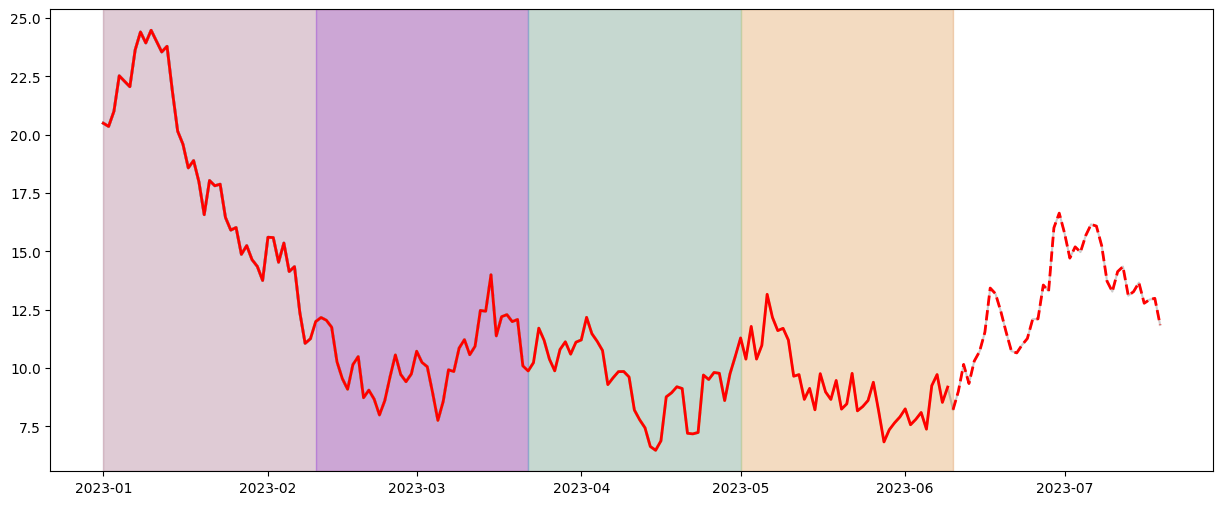

In [2]:
# Visualizing Time Series Cross-Validation Methods


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class CrossValidationVisualizer:
    def __init__(self, data_length=100):
        # Generate sample time series data
        np.random.seed(42)
        self.dates = pd.date_range('2023-01-01', periods=data_length)
        self.data = np.cumsum(np.random.randn(data_length)) + 20

    def plot_expanding_window(self, n_splits=4):
        """Visualize expanding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        # Calculate window sizes
        initial_window = len(self.data) // (n_splits + 1)
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            train_end = initial_window + (i * initial_window)
            test_end = train_end + initial_window

            # Plot training data
            ax.plot(self.dates[:train_end], self.data[:train_end],
                   color=color, linewidth=2,
                   label=f'Training Set {i+1}')

            # Plot test data
            ax.plot(self.dates[train_end:test_end], self.data[train_end:test_end],
                   '--', color=color, linewidth=2,
                   label=f'Test Set {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[0], self.dates[train_end],
                      alpha=0.1, color=color)
            ax.axvspan(self.dates[train_end], self.dates[test_end],
                      alpha=0.3, color=color)

        ax.set_title('Expanding Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_rolling_window(self, window_size=30, step_size=10):
        """Visualize rolling window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        n_splits = (len(self.data) - window_size) // step_size
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            start_idx = i * step_size
            train_end = start_idx + window_size
            test_end = train_end + step_size

            if test_end > len(self.data):
                break

            # Plot training data
            ax.plot(self.dates[start_idx:train_end],
                   self.data[start_idx:train_end],
                   color=color, linewidth=2,
                   label=f'Training Window {i+1}')

            # Plot test data
            ax.plot(self.dates[train_end:test_end],
                   self.data[train_end:test_end],
                   '--', color=color, linewidth=2,
                   label=f'Test Window {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[start_idx], self.dates[train_end],
                      alpha=0.1, color=color)
            ax.axvspan(self.dates[train_end], self.dates[test_end],
                      alpha=0.3, color=color)

        ax.set_title('Rolling Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_sliding_window(self, window_size=30, horizon=10):
        """Visualize sliding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        n_splits = (len(self.data) - window_size - horizon) // horizon
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            start_idx = i * horizon
            train_end = start_idx + window_size
            test_end = train_end + horizon

            if test_end > len(self.data):
                break

            # Plot training data
            ax.plot(self.dates[start_idx:train_end],
                   self.data[start_idx:train_end],
                   color=color, linewidth=2,
                   label=f'Training Window {i+1}')

            # Plot test data
            ax.plot(self.dates[train_end:test_end],
                   self.data[train_end:test_end],
                   '--', color=color, linewidth=2,
                   label=f'Forecast Horizon {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[start_idx], self.dates[train_end],
                      alpha=0.1, color=color)
            ax.axvspan(self.dates[train_end], self.dates[test_end],
                      alpha=0.3, color=color)

        ax.set_title('Sliding Window Cross-Validation with Fixed Horizon')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_blocked_cv(self, n_blocks=5):
        """Visualize blocked cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        block_size = len(self.data) // n_blocks
        colors = plt.cm.rainbow(np.linspace(0, 1, n_blocks))

        for i, color in enumerate(colors):
            start_idx = i * block_size
            end_idx = start_idx + block_size

            # Plot block
            ax.plot(self.dates[start_idx:end_idx],
                   self.data[start_idx:end_idx],
                   color=color, linewidth=2,
                   label=f'Block {i+1}')

            # Add shaded region
            ax.axvspan(self.dates[start_idx], self.dates[end_idx],
                      alpha=0.2, color=color)

        ax.set_title('Blocked Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

# Create visualizations
cv_viz = CrossValidationVisualizer(data_length=200)

# Generate all plots
expanding_window_fig = cv_viz.plot_expanding_window(n_splits=4)
rolling_window_fig = cv_viz.plot_rolling_window(window_size=50, step_size=20)
sliding_window_fig = cv_viz.plot_sliding_window(window_size=50, horizon=20)
blocked_cv_fig = cv_viz.plot_blocked_cv(n_blocks=5)

# Save all figures
expanding_window_fig.savefig('expanding_window_cv.png', bbox_inches='tight', dpi=300)
rolling_window_fig.savefig('rolling_window_cv.png', bbox_inches='tight', dpi=300)
sliding_window_fig.savefig('sliding_window_cv.png', bbox_inches='tight', dpi=300)
blocked_cv_fig.savefig('blocked_cv.png', bbox_inches='tight', dpi=300)

plt.show()

def plot_cv_scheme(cv_type='expanding', n_splits=4):
    """Create schematic representation of CV schemes"""
    fig, ax = plt.subplots(figsize=(12, 4))

    total_length = 100
    height = 1
    y_positions = np.arange(n_splits) * height * 1.5

    if cv_type == 'expanding':
        initial_size = total_length // (n_splits + 1)
        for i in range(n_splits):
            train_end = initial_size + (i * initial_size)
            test_end = train_end + initial_size

            # Training block
            ax.add_patch(Rectangle((0, y_positions[i]), train_end, height,
                                 facecolor='blue', alpha=0.3))
            # Test block
            ax.add_patch(Rectangle((train_end, y_positions[i]), initial_size, height,
                                 facecolor='red', alpha=0.3))

    elif cv_type == 'rolling':
        window_size = total_length // 3
        step_size = window_size // 2
        for i in range(n_splits):
            start = i * step_size
            train_end = start + window_size
            test_end = train_end + step_size

            # Training block
            ax.add_patch(Rectangle((start, y_positions[i]), window_size, height,
                                 facecolor='blue', alpha=0.3))
            # Test block
            ax.add_patch(Rectangle((train_end, y_positions[i]), step_size, height,
                                 facecolor='red', alpha=0.3))

    elif cv_type == 'blocked':
        block_size = total_length // n_splits
        for i in range(n_splits):
            test_block = i

            for j in range(n_splits):
                if j != test_block:
                    # Training block
                    ax.add_patch(Rectangle((j * block_size, y_positions[i]),
                                         block_size, height,
                                         facecolor='blue', alpha=0.3))
            # Test block
            ax.add_patch(Rectangle((test_block * block_size, y_positions[i]),
                                 block_size, height,
                                 facecolor='red', alpha=0.3))

    ax.set_xlim(-5, total_length + 5)
    ax.set_ylim(-height, max(y_positions) + height * 2)
    ax.set_title(f'{cv_type.capitalize()} Window Cross-Validation Scheme')
    ax.set_xlabel('Time')
    ax.set_yticks(y_positions + height/2)
    ax.set_yticklabels([f'Split {i+1}' for i in range(n_splits)])

    # Add legend
    ax.add_patch(Rectangle((0, max(y_positions) + height), 20, height,
                          facecolor='blue', alpha=0.3, label='Training'))
    ax.add_patch(Rectangle((25, max(y_positions) + height), 20, height,
                          facecolor='red', alpha=0.3, label='Testing'))
    plt.legend()

    plt.tight_layout()
    return fig

# Create and save schematic diagrams
schemes = ['expanding', 'rolling', 'blocked']
for scheme in schemes:
    fig = plot_cv_scheme(scheme)
    fig.savefig(f'{scheme}_scheme.png', bbox_inches='tight', dpi=300)
    plt.close()


IndexError: index 200 is out of bounds for axis 0 with size 200

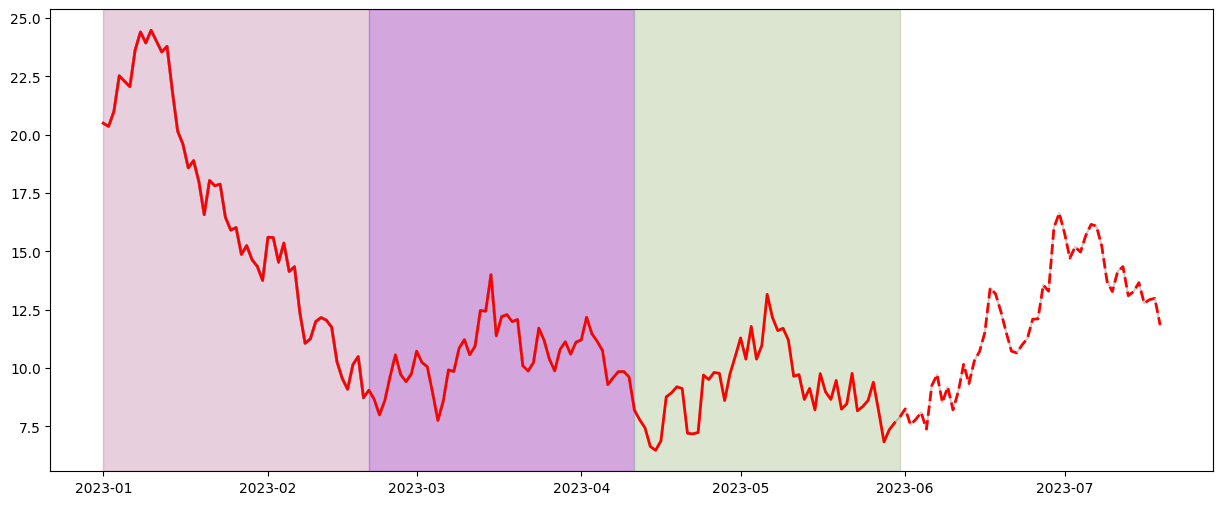

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class CrossValidationVisualizer:
    def __init__(self, data_length=200):
        # Generate sample time series data
        np.random.seed(42)
        self.dates = pd.date_range('2023-01-01', periods=data_length)
        self.data = np.cumsum(np.random.randn(data_length)) + 20

    def plot_expanding_window(self, n_splits=4):
        """Visualize expanding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        # Calculate window sizes
        total_length = len(self.data)
        initial_window = total_length // (n_splits + 1)
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            train_end = initial_window + (i * initial_window)
            test_end = min(train_end + initial_window, total_length)

            if train_end >= total_length:
                break

            # Plot training data
            ax.plot(self.dates[:train_end], self.data[:train_end],
                   color=color, linewidth=2,
                   label=f'Training Set {i+1}')

            # Plot test data
            if test_end > train_end:
                ax.plot(self.dates[train_end:test_end], self.data[train_end:test_end],
                       '--', color=color, linewidth=2,
                       label=f'Test Set {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[0], self.dates[train_end],
                      alpha=0.1, color=color)
            if test_end > train_end:
                ax.axvspan(self.dates[train_end], self.dates[test_end],
                          alpha=0.3, color=color)

        ax.set_title('Expanding Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_rolling_window(self, window_size=30, step_size=10):
        """Visualize rolling window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        total_length = len(self.data)
        n_splits = (total_length - window_size) // step_size
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            start_idx = i * step_size
            train_end = min(start_idx + window_size, total_length)
            test_end = min(train_end + step_size, total_length)

            if train_end >= total_length or start_idx >= total_length:
                break

            # Plot training data
            ax.plot(self.dates[start_idx:train_end],
                   self.data[start_idx:train_end],
                   color=color, linewidth=2,
                   label=f'Training Window {i+1}')

            # Plot test data
            if test_end > train_end:
                ax.plot(self.dates[train_end:test_end],
                       self.data[train_end:test_end],
                       '--', color=color, linewidth=2,
                       label=f'Test Window {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[start_idx], self.dates[train_end],
                      alpha=0.1, color=color)
            if test_end > train_end:
                ax.axvspan(self.dates[train_end], self.dates[test_end],
                          alpha=0.3, color=color)

        ax.set_title('Rolling Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_sliding_window(self, window_size=30, horizon=10):
        """Visualize sliding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        total_length = len(self.data)
        n_splits = (total_length - window_size - horizon) // horizon
        colors = plt.cm.rainbow(np.linspace(0, 1, max(1, n_splits)))

        for i, color in enumerate(colors):
            start_idx = i * horizon
            train_end = min(start_idx + window_size, total_length)
            test_end = min(train_end + horizon, total_length)

            if train_end >= total_length or start_idx >= total_length:
                break

            # Plot training data
            ax.plot(self.dates[start_idx:train_end],
                   self.data[start_idx:train_end],
                   color=color, linewidth=2,
                   label=f'Training Window {i+1}')

            # Plot test data
            if test_end > train_end:
                ax.plot(self.dates[train_end:test_end],
                       self.data[train_end:test_end],
                       '--', color=color, linewidth=2,
                       label=f'Forecast Horizon {i+1}')

            # Add shaded regions
            ax.axvspan(self.dates[start_idx], self.dates[train_end],
                      alpha=0.1, color=color)
            if test_end > train_end:
                ax.axvspan(self.dates[train_end], self.dates[test_end],
                          alpha=0.3, color=color)

        ax.set_title('Sliding Window Cross-Validation with Fixed Horizon')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_blocked_cv(self, n_blocks=5):
        """Visualize blocked cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot the full data
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        total_length = len(self.data)
        block_size = total_length // n_blocks
        colors = plt.cm.rainbow(np.linspace(0, 1, n_blocks))

        for i, color in enumerate(colors):
            start_idx = i * block_size
            end_idx = min(start_idx + block_size, total_length)

            if start_idx >= total_length:
                break

            # Plot block
            ax.plot(self.dates[start_idx:end_idx],
                   self.data[start_idx:end_idx],
                   color=color, linewidth=2,
                   label=f'Block {i+1}')

            # Add shaded region
            ax.axvspan(self.dates[start_idx], self.dates[end_idx],
                      alpha=0.2, color=color)

        ax.set_title('Blocked Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

# Create visualizations with more appropriate parameters
cv_viz = CrossValidationVisualizer(data_length=200)

# Generate all plots with adjusted parameters
expanding_window_fig = cv_viz.plot_expanding_window(n_splits=3)
rolling_window_fig = cv_viz.plot_rolling_window(window_size=40, step_size=30)
sliding_window_fig = cv_viz.plot_sliding_window(window_size=40, horizon=15)
blocked_cv_fig = cv_viz.plot_blocked_cv(n_blocks=4)

# Save all figures
expanding_window_fig.savefig('expanding_window_cv.png', bbox_inches='tight', dpi=300)
rolling_window_fig.savefig('rolling_window_cv.png', bbox_inches='tight', dpi=300)
sliding_window_fig.savefig('sliding_window_cv.png', bbox_inches='tight', dpi=300)
blocked_cv_fig.savefig('blocked_cv.png', bbox_inches='tight', dpi=300)

plt.show()


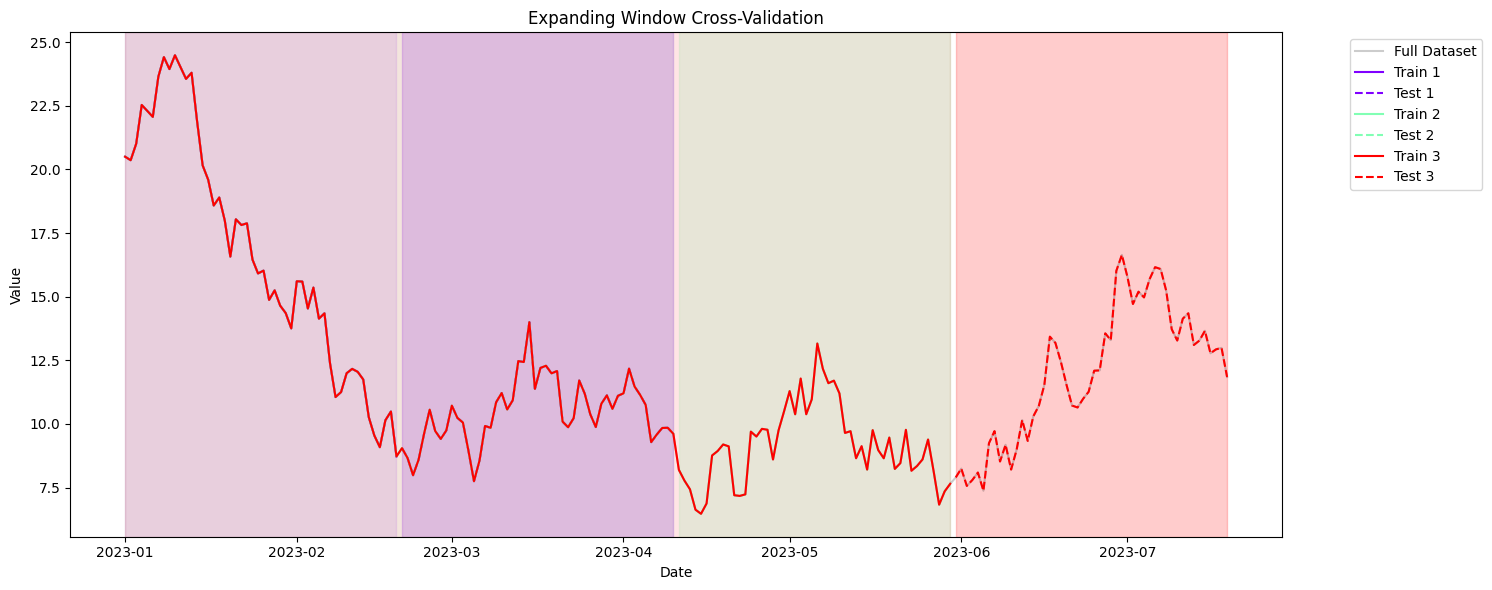

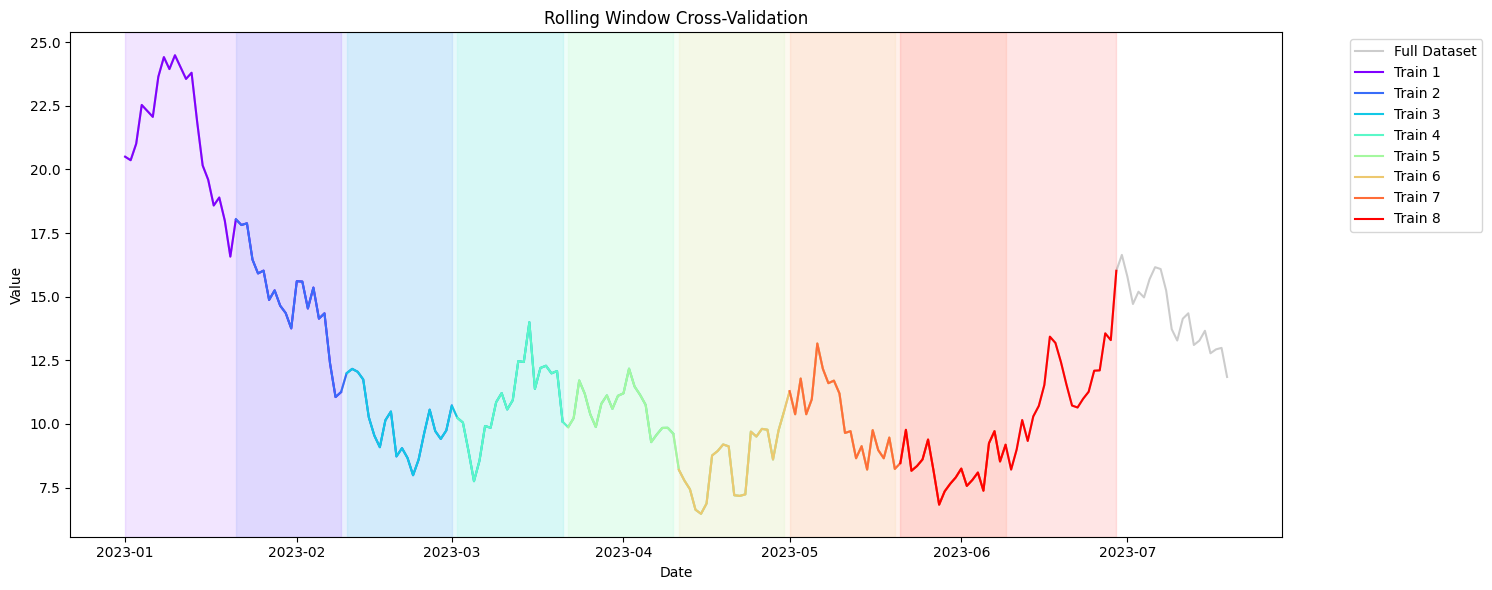

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CrossValidationVisualizer:
    def __init__(self, data_length=200):
        np.random.seed(42)
        self.dates = pd.date_range('2023-01-01', periods=data_length)
        self.data = np.cumsum(np.random.randn(data_length)) + 20

    def plot_expanding_window(self, n_splits=3):
        """Visualize expanding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot full dataset
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        # Calculate split points
        total_points = len(self.data)
        split_size = total_points // (n_splits + 1)
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            # Calculate indices
            train_end = split_size * (i + 1)
            test_start = train_end
            test_end = train_end + split_size

            # Ensure we don't exceed data bounds
            if test_end > total_points:
                break

            # Plot training data
            ax.plot(self.dates[:train_end],
                   self.data[:train_end],
                   color=color,
                   label=f'Train {i+1}')

            # Plot test data
            ax.plot(self.dates[test_start:test_end],
                   self.data[test_start:test_end],
                   '--',
                   color=color,
                   label=f'Test {i+1}')

            # Add shading
            ax.axvspan(self.dates[0],
                      self.dates[train_end-1],
                      alpha=0.1,
                      color=color)
            ax.axvspan(self.dates[test_start],
                      self.dates[test_end-1],
                      alpha=0.2,
                      color=color)

        ax.set_title('Expanding Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_rolling_window(self, window_size=40, step_size=20):
        """Visualize rolling window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot full dataset
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        total_points = len(self.data)
        n_splits = (total_points - window_size) // step_size
        colors = plt.cm.rainbow(np.linspace(0, 1, n_splits))

        for i, color in enumerate(colors):
            start = i * step_size
            train_end = start + window_size

            if train_end >= total_points:
                break

            # Plot training window
            ax.plot(self.dates[start:train_end],
                   self.data[start:train_end],
                   color=color,
                   label=f'Train {i+1}')

            # Add shading
            ax.axvspan(self.dates[start],
                      self.dates[train_end-1],
                      alpha=0.1,
                      color=color)

        ax.set_title('Rolling Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

    def plot_sliding_window(self, window_size=40, horizon=10):
        """Visualize sliding window cross-validation"""
        fig, ax = plt.subplots(figsize=(15, 6))

        # Plot full dataset
        ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

        total_points = len(self.data)
        n_splits = (total_points - window_size - horizon) // horizon
        colors = plt.cm.rainbow(np.linspace(0, 1, max(1, n_splits)))

        for i, color in enumerate(colors):
            start = i * horizon
            train_end = start + window_size
            test_end = train_end + horizon

            if test_end >= total_points:
                break

            # Plot training window
            ax.plot(self.dates[start:train_end],
                   self.data[start:train_end],
                   color=color,
                   label=f'Train {i+1}')

            # Plot forecast window
            ax.plot(self.dates[train_end:test_end],
                   self.data[train_end:test_end],
                   '--',
                   color=color,
                   label=f'Forecast {i+1}')

            # Add shading
            ax.axvspan(self.dates[start],
                      self.dates[train_end-1],
                      alpha=0.1,
                      color=color)
            ax.axvspan(self.dates[train_end],
                      self.dates[test_end-1],
                      alpha=0.2,
                      color=color)

        ax.set_title('Sliding Window Cross-Validation')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        return fig

# Create instance
cv_viz = CrossValidationVisualizer(data_length=200)

# Create individual plots
fig1 = cv_viz.plot_expanding_window(n_splits=3)
fig2 = cv_viz.plot_rolling_window(window_size=40, step_size=20)
fig3 = cv_viz.plot_sliding_window(window_size=40, horizon=10)

# Save figures
fig1.savefig('expanding_window.png', bbox_inches='tight', dpi=300)
fig2.savefig('rolling_window.png', bbox_inches='tight', dpi=300)
fig3.savefig('sliding_window.png', bbox_inches='tight', dpi=300)

plt.show()


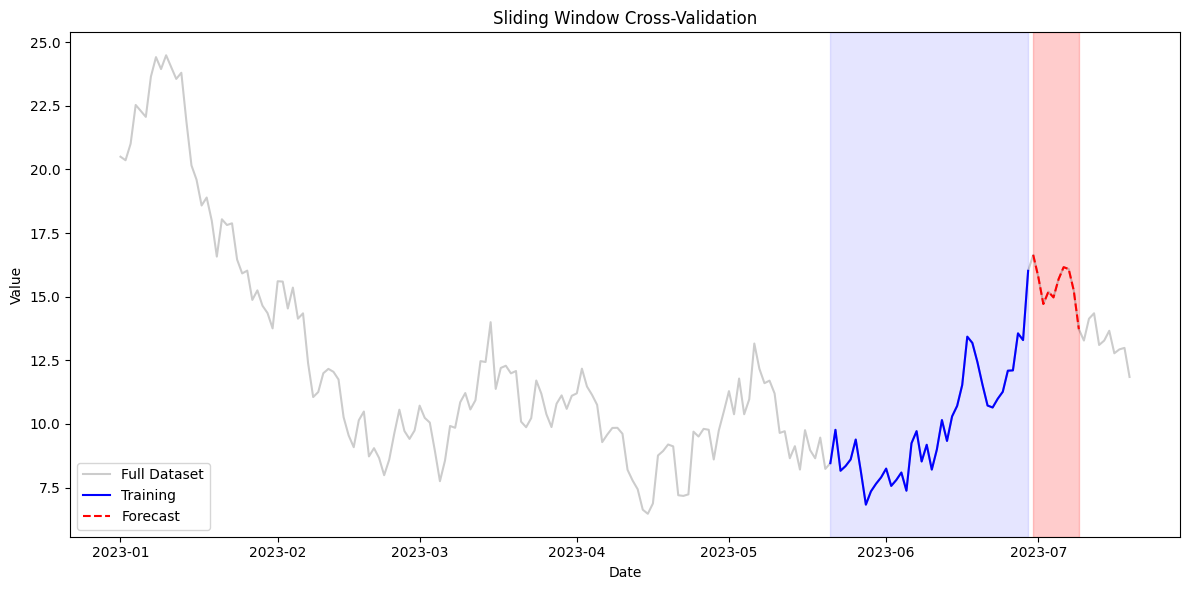

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

class AnimatedCrossValidation:
    def __init__(self, data_length=200):
        np.random.seed(42)
        self.dates = pd.date_range('2023-01-01', periods=data_length)
        self.data = np.cumsum(np.random.randn(data_length)) + 20

    def create_expanding_window_animation(self, n_splits=3):
        fig, ax = plt.subplots(figsize=(12, 6))

        total_points = len(self.data)
        split_size = total_points // (n_splits + 1)

        def animate(i):
            ax.clear()

            # Plot full dataset
            ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

            # Calculate current window
            train_end = split_size * ((i // 15) + 1)  # Change window every 15 frames
            test_start = train_end
            test_end = train_end + split_size

            if test_end <= total_points:
                # Plot training data
                ax.plot(self.dates[:train_end],
                       self.data[:train_end],
                       'b-',
                       label='Training')

                # Plot test data
                ax.plot(self.dates[test_start:test_end],
                       self.data[test_start:test_end],
                       'r--',
                       label='Test')

                # Add shading
                ax.axvspan(self.dates[0],
                          self.dates[train_end-1],
                          alpha=0.1,
                          color='blue')
                ax.axvspan(self.dates[test_start],
                          self.dates[test_end-1],
                          alpha=0.2,
                          color='red')

            ax.set_title('Expanding Window Cross-Validation')
            ax.set_xlabel('Date')
            ax.set_ylabel('Value')
            ax.legend()
            plt.tight_layout()

        anim = FuncAnimation(fig, animate, frames=15*n_splits,
                           interval=500, repeat=True)
        return anim

    def create_rolling_window_animation(self, window_size=40, step_size=20):
        fig, ax = plt.subplots(figsize=(12, 6))

        total_points = len(self.data)
        n_splits = (total_points - window_size) // step_size

        def animate(i):
            ax.clear()

            # Plot full dataset
            ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

            # Calculate current window
            start = (i // 15) * step_size  # Change window every 15 frames
            train_end = start + window_size

            if train_end <= total_points:
                # Plot training window
                ax.plot(self.dates[start:train_end],
                       self.data[start:train_end],
                       'b-',
                       label='Training Window')

                # Add shading
                ax.axvspan(self.dates[start],
                          self.dates[train_end-1],
                          alpha=0.2,
                          color='blue')

            ax.set_title('Rolling Window Cross-Validation')
            ax.set_xlabel('Date')
            ax.set_ylabel('Value')
            ax.legend()
            plt.tight_layout()

        anim = FuncAnimation(fig, animate, frames=15*n_splits,
                           interval=500, repeat=True)
        return anim

    def create_sliding_window_animation(self, window_size=40, horizon=10):
        fig, ax = plt.subplots(figsize=(12, 6))

        total_points = len(self.data)
        n_splits = (total_points - window_size - horizon) // horizon

        def animate(i):
            ax.clear()

            # Plot full dataset
            ax.plot(self.dates, self.data, 'k-', alpha=0.2, label='Full Dataset')

            # Calculate current window
            start = (i // 15) * horizon  # Change window every 15 frames
            train_end = start + window_size
            test_end = train_end + horizon

            if test_end <= total_points:
                # Plot training window
                ax.plot(self.dates[start:train_end],
                       self.data[start:train_end],
                       'b-',
                       label='Training')

                # Plot forecast window
                ax.plot(self.dates[train_end:test_end],
                       self.data[train_end:test_end],
                       'r--',
                       label='Forecast')

                # Add shading
                ax.axvspan(self.dates[start],
                          self.dates[train_end-1],
                          alpha=0.1,
                          color='blue')
                ax.axvspan(self.dates[train_end],
                          self.dates[test_end-1],
                          alpha=0.2,
                          color='red')

            ax.set_title('Sliding Window Cross-Validation')
            ax.set_xlabel('Date')
            ax.set_ylabel('Value')
            ax.legend()
            plt.tight_layout()

        anim = FuncAnimation(fig, animate, frames=15*n_splits,
                           interval=500, repeat=True)
        return anim

# Create animations
cv_anim = AnimatedCrossValidation(data_length=200)

# Generate animations
expanding_anim = cv_anim.create_expanding_window_animation(n_splits=3)
rolling_anim = cv_anim.create_rolling_window_animation(window_size=40, step_size=20)
sliding_anim = cv_anim.create_sliding_window_animation(window_size=40, horizon=10)

# Save animations as GIFs
expanding_anim.save('expanding_window.gif', writer='pillow')
rolling_anim.save('rolling_window.gif', writer='pillow')
sliding_anim.save('sliding_window.gif', writer='pillow')

plt.show()



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class CausalInferenceVisualizer:
    def __init__(self):
        np.random.seed(42)
        self.t = np.linspace(0, 10, 500)

        # Generate two related time series
        self.x = np.sin(self.t) + np.random.normal(0, 0.1, len(self.t))
        self.y = np.sin(self.t + 0.5) + np.random.normal(0, 0.1, len(self.t))

    def create_animation(self):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Causal Analysis in Time Series', fontsize=16)

        def animate(frame):
            # Clear all axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Plot 1: Original Time Series
            window = 100
            start_idx = frame % (len(self.t) - window)
            end_idx = start_idx + window

            ax1.plot(self.t[start_idx:end_idx], self.x[start_idx:end_idx],
                    label='Series X', color='blue')
            ax1.plot(self.t[start_idx:end_idx], self.y[start_idx:end_idx],
                    label='Series Y', color='red')
            ax1.set_title('Time Series Data')
            ax1.legend()
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Value')

            # Plot 2: Granger Causality
            lags = 20
            if start_idx > lags:
                x_lagged = self.x[start_idx-lags:end_idx-lags]
                y_current = self.y[start_idx:end_idx]
                ax2.scatter(x_lagged, y_current, alpha=0.5, color='purple')
                ax2.set_title('Granger Causality Analysis')
                ax2.set_xlabel('X (lagged)')
                ax2.set_ylabel('Y (current)')

            # Plot 3: Treatment Effect
            treatment_period = len(self.t) // 2
            ax3.plot(self.t[:treatment_period], self.y[:treatment_period],
                    color='blue', label='Pre-treatment')
            ax3.plot(self.t[treatment_period:], self.y[treatment_period:],
                    color='red', label='Post-treatment')
            ax3.axvline(x=self.t[treatment_period], color='black', linestyle='--',
                       label='Treatment')
            ax3.set_title('Treatment Effect Analysis')
            ax3.legend()
            ax3.set_xlabel('Time')
            ax3.set_ylabel('Outcome')

            # Plot 4: Impulse Response
            impulse = np.zeros(50)
            impulse[0] = 1
            response = np.exp(-np.arange(50) * 0.1) * np.sin(np.arange(50) * 0.5)
            ax4.plot(range(50), response, color='green')
            ax4.set_title('Impulse Response Function')
            ax4.set_xlabel('Time')
            ax4.set_ylabel('Response')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        anim = FuncAnimation(fig, animate, frames=len(self.t)-100,
                           interval=50, repeat=True)

        return anim

# Create and save animation
visualizer = CausalInferenceVisualizer()
anim = visualizer.create_animation()
anim.save('causal_inference.gif', writer='pillow')
plt.close()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

class KalmanFilterVisualizer:
    def __init__(self):
        # Generate true trajectory
        self.t = np.linspace(0, 4*np.pi, 200)
        self.true_position = 10 * np.sin(self.t)
        self.true_velocity = 10 * np.cos(self.t)
        # Define window size as class attribute
        self.window = 100
        # Add noise to create measurements
        self.measurements = self.true_position + np.random.normal(0, 1, len(self.t))

        # Initialize Kalman filter estimates
        self.estimates = np.zeros_like(self.true_position)
        self.uncertainties = np.zeros_like(self.true_position)

    def confidence_ellipse(self, x, y, cov, ax, n_std=3.0, **kwargs):
        """Create a confidence ellipse"""
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)

        ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                         **kwargs)

        scale_x = np.sqrt(cov[0, 0]) * n_std
        scale_y = np.sqrt(cov[1, 1]) * n_std

        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(x, y)

        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # State estimation
        ax2 = fig.add_subplot(gs[1, 0])  # Phase space
        ax3 = fig.add_subplot(gs[1, 1])  # Error distribution

        def animate(frame):
            # Clear previous frame
            ax1.clear()
            ax2.clear()
            ax3.clear()

            # Window size for visualization
            window = 50
            start_idx = max(0, frame - window)
            end_idx = frame + 1

            # Plot 1: State Estimation
            ax1.plot(self.t[start_idx:end_idx], self.true_position[start_idx:end_idx],
                    'g-', label='True State', alpha=0.5)
            ax1.plot(self.t[start_idx:end_idx], self.measurements[start_idx:end_idx],
                    'r.', label='Measurements', alpha=0.5)
            ax1.plot(self.t[start_idx:end_idx], self.estimates[start_idx:end_idx],
                    'b-', label='Kalman Filter Estimate')

            # Add uncertainty bounds
            uncertainty = 2 * np.sqrt(self.uncertainties[start_idx:end_idx])
            ax1.fill_between(self.t[start_idx:end_idx],
                           self.estimates[start_idx:end_idx] - uncertainty,
                           self.estimates[start_idx:end_idx] + uncertainty,
                           color='blue', alpha=0.2)

            ax1.set_title('State Estimation with Kalman Filter')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Phase Space
            ax2.plot(self.true_position[start_idx:end_idx],
                    self.true_velocity[start_idx:end_idx],
                    'g-', label='True Trajectory')
            ax2.plot(self.estimates[start_idx:end_idx],
                    np.gradient(self.estimates[start_idx:end_idx]),
                    'b-', label='Estimated Trajectory')

            # Add current state point
            if frame > 0:
                cov = np.array([[self.uncertainties[frame], 0],
                              [0, np.gradient(self.uncertainties)[frame]]])
                self.confidence_ellipse(self.estimates[frame],
                                     np.gradient(self.estimates)[frame],
                                     cov, ax2, alpha=0.2, color='blue')

            ax2.set_title('Phase Space')
            ax2.set_xlabel('Position')
            ax2.set_ylabel('Velocity')
            ax2.legend()
            ax2.grid(True)

            # Plot 3: Error Distribution
            if frame > 0:
                errors = self.measurements[:frame] - self.estimates[:frame]
                ax3.hist(errors, bins=20, density=True, alpha=0.6)
                ax3.set_title('Error Distribution')
                ax3.set_xlabel('Error')
                ax3.set_ylabel('Density')
                ax3.grid(True)

            plt.tight_layout()

        # Run Kalman filter
        P = 1.0  # Initial uncertainty
        Q = 0.1  # Process noise
        R = 1.0  # Measurement noise

        x = self.measurements[0]  # Initial state estimate

        for i in range(len(self.t)):
            # Predict
            P = P + Q

            # Update
            K = P / (P + R)  # Kalman gain
            x = x + K * (self.measurements[i] - x)
            P = (1 - K) * P

            # Store results
            self.estimates[i] = x
            self.uncertainties[i] = P

        # Create animation
        anim = FuncAnimation(fig, animate, frames=len(self.t),
                           interval=50, repeat=True)

        return anim

# Create and save animation
visualizer = KalmanFilterVisualizer()
anim = visualizer.create_animation()
anim.save('kalman_filter.gif', writer='pillow', fps=30)
plt.close()


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7d67f7f4a440> (for post_execute):


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [9]:
"""
works
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated process data
time = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.random.normal(50, 2, 100)

# Introduce out-of-control points
values[30:35] += 8
values[70:75] -= 8

# Create a DataFrame
df = pd.DataFrame({"Time": time, "Value": values})

# Calculate control limits
mean = df["Value"].mean()
std_dev = df["Value"].std()
ucl = mean + 3 * std_dev  # Upper Control Limit
lcl = mean - 3 * std_dev  # Lower Control Limit

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize empty line objects
line, = ax.plot([], [], label="Process Data", marker="o", linestyle="-")
ucl_line = ax.axhline(ucl, color="red", linestyle="--", label="Upper Control Limit (UCL)")
lcl_line = ax.axhline(lcl, color="red", linestyle="--", label="Lower Control Limit (LCL)")
mean_line = ax.axhline(mean, color="blue", linestyle="--", label="Mean")

# Set up the plot
ax.set_xlim(df["Time"].min(), df["Time"].max())
ax.set_ylim(min(lcl, df["Value"].min()) - 1, max(ucl, df["Value"].max()) + 1)
ax.set_title("Control Chart with Out-of-Control Areas")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()
ax.grid(True)

# Animation function
def animate(i):
    data = df.iloc[:i+1]
    line.set_data(data["Time"], data["Value"])

    # Highlight out-of-control points
    out_of_control = (data["Value"] > ucl) | (data["Value"] < lcl)
    ax.scatter(data["Time"][out_of_control], data["Value"][out_of_control], color="red")

    # Shade out-of-control regions
    for j in range(i):
        if out_of_control.iloc[j]:
            ax.axvspan(data["Time"].iloc[j], data["Time"].iloc[j+1],
                       facecolor="red", alpha=0.1)

    return line, ucl_line, lcl_line, mean_line

# Create the animation
anim = FuncAnimation(fig, animate, frames=len(df), interval=100, blit=True, repeat=False)

# Save the animation as a GIF
anim.save('control_chart_animation.gif', writer='pillow', fps=10)

plt.close(fig)


In [10]:
"""
don't use
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

class TimeSeriesFeatureVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        n = 500
        self.dates = pd.date_range(start="2020-01-01", periods=n, freq="D")
        self.values = 100 + np.cumsum(np.random.normal(0, 1, n))
        self.df = pd.DataFrame({"date": self.dates, "value": self.values})

        # Calculate features
        self.calculate_features()

    def calculate_features(self):
        # Rolling statistics
        self.df['rolling_mean_7'] = self.df['value'].rolling(window=7).mean()
        self.df['rolling_std_7'] = self.df['value'].rolling(window=7).std()

        # Lagged features
        self.df['lag_1'] = self.df['value'].shift(1)
        self.df['lag_7'] = self.df['value'].shift(7)

        # Fourier features
        t = np.arange(len(self.df))
        period = 30  # 30-day seasonality
        self.df['fourier_sin'] = np.sin(2 * np.pi * t / period)
        self.df['fourier_cos'] = np.cos(2 * np.pi * t / period)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(3, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Original series + rolling stats
        ax2 = fig.add_subplot(gs[1, 0])  # Lagged features
        ax3 = fig.add_subplot(gs[1, 1])  # Fourier components
        ax4 = fig.add_subplot(gs[2, :])  # Feature importance

        # Define window size as class attribute
        self.window = 100

        def animate(frame):
            # Clear previous frame
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Use window size from class attribute
            start_idx = max(0, frame - self.window)
            end_idx = frame + 1

            # Plot 1: Original series with rolling statistics
            ax1.plot(self.df['date'][start_idx:end_idx],
                    self.df['value'][start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.df['date'][start_idx:end_idx],
                    self.df['rolling_mean_7'][start_idx:end_idx],
                    label='7-day MA', color='red')
            ax1.fill_between(self.df['date'][start_idx:end_idx],
                           self.df['rolling_mean_7'][start_idx:end_idx] -
                           self.df['rolling_std_7'][start_idx:end_idx],
                           self.df['rolling_mean_7'][start_idx:end_idx] +
                           self.df['rolling_std_7'][start_idx:end_idx],
                           alpha=0.2, color='red')
            ax1.set_title('Time Series with Rolling Statistics')
            ax1.legend()

            # Plot 2: Lagged features
            if frame > 7:
                ax2.scatter(self.df['lag_1'][start_idx:end_idx],
                          self.df['value'][start_idx:end_idx],
                          alpha=0.5, label='Lag 1')
                ax2.scatter(self.df['lag_7'][start_idx:end_idx],
                          self.df['value'][start_idx:end_idx],
                          alpha=0.5, label='Lag 7')
                ax2.set_title('Lagged Features')
                ax2.set_xlabel('Lagged Value')
                ax2.set_ylabel('Current Value')
                ax2.legend()

            # Plot 3: Fourier components
            ax3.plot(self.df['date'][start_idx:end_idx],
                    self.df['fourier_sin'][start_idx:end_idx],
                    label='Sine', color='green')
            ax3.plot(self.df['date'][start_idx:end_idx],
                    self.df['fourier_cos'][start_idx:end_idx],
                    label='Cosine', color='orange')
            ax3.set_title('Fourier Components')
            ax3.legend()

           """ # Plot 4: Feature importance (simulated)
            features = ['rolling_mean_7', 'rolling_std_7', 'lag_1', 'lag_7',
                       'fourier_sin', 'fourier_cos']
            importance = np.abs(np.random.normal(size=len(features)))  # Simulated importance
            ax4.barh(features, importance)
            ax4.set_title('Feature Importance')

            plt.tight_layout()"""

        anim = FuncAnimation(fig, animate,
                           frames=len(self.df)-self.window,
                           interval=50, repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesFeatureVisualizer()
anim = visualizer.create_animation()
anim.save('pytimetk_features.gif', writer='pillow', fps=30)
plt.close()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


class TimeSeriesFeatureVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        n = 500
        self.dates = pd.date_range(start="2020-01-01", periods=n, freq="D")
        self.values = 100 + np.cumsum(np.random.normal(0, 1, n))
        self.df = pd.DataFrame({"date": self.dates, "value": self.values})

        # Calculate features
        self.calculate_features()

    def calculate_features(self):
        # Rolling statistics
        self.df['rolling_mean_7'] = self.df['value'].rolling(window=7).mean()
        self.df['rolling_std_7'] = self.df['value'].rolling(window=7).std()

        # Lagged features
        self.df['lag_1'] = self.df['value'].shift(1)
        self.df['lag_7'] = self.df['value'].shift(7)

        # Fourier features
        t = np.arange(len(self.df))
        period = 30  # 30-day seasonality
        self.df['fourier_sin'] = np.sin(2 * np.pi * t / period)
        self.df['fourier_cos'] = np.cos(2 * np.pi * t / period)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(3, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Original series + rolling stats
        ax2 = fig.add_subplot(gs[1, 0])  # Lagged features
        ax3 = fig.add_subplot(gs[1, 1])  # Fourier components

        # Define window size as class attribute
        self.window = 100

        def animate(frame):
            # Clear previous frame
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Use window size from class attribute
            start_idx = max(0, frame - self.window)
            end_idx = frame + 1

            # Plot 1: Original series with rolling statistics
            ax1.plot(self.df['date'][start_idx:end_idx],
                    self.df['value'][start_idx:end_idx],
                    label='Original', color='blue')
            ax1.plot(self.df['date'][start_idx:end_idx],
                    self.df['rolling_mean_7'][start_idx:end_idx],
                    label='7-day MA', color='red')
            ax1.fill_between(self.df['date'][start_idx:end_idx],
                           self.df['rolling_mean_7'][start_idx:end_idx] -
                           self.df['rolling_std_7'][start_idx:end_idx],
                           self.df['rolling_mean_7'][start_idx:end_idx] +
                           self.df['rolling_std_7'][start_idx:end_idx],
                           alpha=0.2, color='red')
            ax1.set_title('Time Series with Rolling Statistics')
            ax1.legend()

            # Plot 2: Lagged features
            if frame > 7:
                ax2.scatter(self.df['lag_1'][start_idx:end_idx],
                          self.df['value'][start_idx:end_idx],
                          alpha=0.5, label='Lag 1')
                ax2.scatter(self.df['lag_7'][start_idx:end_idx],
                          self.df['value'][start_idx:end_idx],
                          alpha=0.5, label='Lag 7')
                ax2.set_title('Lagged Features')
                ax2.set_xlabel('Lagged Value')
                ax2.set_ylabel('Current Value')
                ax2.legend()

            # Plot 3: Fourier components
            ax3.plot(self.df['date'][start_idx:end_idx],
                    self.df['fourier_sin'][start_idx:end_idx],
                    label='Sine', color='green')
            ax3.plot(self.df['date'][start_idx:end_idx],
                    self.df['fourier_cos'][start_idx:end_idx],
                    label='Cosine', color='orange')
            ax3.set_title('Fourier Components')
            ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.df)-self.window,
                           interval=200,  # Increased to 200 milliseconds
                           repeat=True)
        return anim

# Create and save animation
visualizer = TimeSeriesFeatureVisualizer()
anim = visualizer.create_animation()
anim.save('pytimetk_features.gif', writer='pillow', fps=10)  # Decreased to 10 fps
plt.close()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm

class StatsVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        self.data = [3, 21, 98, 203, 17, 9]
        self.mean = np.mean(self.data)
        self.variance = np.var(self.data, ddof=1)
        self.std_dev = np.std(self.data, ddof=1)

        # Create normal distribution for comparison
        self.x = np.linspace(self.mean - 4*self.std_dev,
                           self.mean + 4*self.std_dev, 100)
        self.normal_dist = norm.pdf(self.x, self.mean, self.std_dev)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Dot plot and deviations
        ax2 = fig.add_subplot(gs[1, 0])  # Squared deviations
        ax3 = fig.add_subplot(gs[1, 1])  # Normal distribution

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Dot plot with deviations
            ax1.scatter(self.data, np.zeros_like(self.data),
                       color='blue', s=100, label='Data points')
            ax1.axvline(self.mean, color='red', linestyle='--',
                       label=f'Mean = {self.mean:.2f}')

            # Animate deviations
            current_point = frame % len(self.data)
            for i in range(current_point + 1):
                deviation = self.data[i] - self.mean
                ax1.arrow(self.mean, 0, deviation, 0,
                         color='green', alpha=0.5,
                         head_width=0.1, head_length=2)

            ax1.set_title('Data Points and Deviations from Mean')
            ax1.legend()

            # Plot 2: Squared deviations
            deviations = [(x - self.mean)**2 for x in self.data[:current_point+1]]
            ax2.bar(range(current_point+1), deviations,
                   color='purple', alpha=0.6)
            if deviations:
                current_variance = np.mean(deviations)
                ax2.axhline(current_variance, color='red', linestyle='--',
                           label=f'Current Variance = {current_variance:.2f}')
            ax2.set_title('Squared Deviations')
            ax2.set_xlabel('Data Point Index')
            ax2.set_ylabel('Squared Deviation')
            ax2.legend()

            # Plot 3: Normal distribution with standard deviations
            ax3.plot(self.x, self.normal_dist, 'b-', label='Normal Distribution')
            ax3.axvline(self.mean, color='red', linestyle='--', label='Mean')

            # Add standard deviation bands
            for i in range(1, 4):
                ax3.axvline(self.mean + i*self.std_dev, color='green',
                          alpha=0.3, linestyle=':')
                ax3.axvline(self.mean - i*self.std_dev, color='green',
                          alpha=0.3, linestyle=':')
                ax3.fill_between(self.x,
                               np.zeros_like(self.x),
                               self.normal_dist,
                               where=(self.x >= self.mean - i*self.std_dev) &
                                    (self.x <= self.mean + i*self.std_dev),
                               alpha=0.1, color='green',
                               label=f'{i}σ = {i*68.27:.1f}%')

            ax3.set_title('Normal Distribution with Standard Deviations')
            ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.data) * 2,  # Slow down animation
                           interval=1000,  # 1 second between frames
                           repeat=True)
        return anim

# Create and save animation
visualizer = StatsVisualizer()
anim = visualizer.create_animation()
anim.save('variance_std_dev.gif', writer='pillow', fps=2)
plt.close()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm

class StatsVisualizer:
    def __init__(self):
        # Generate larger sample data
        np.random.seed(42)
        self.n_points = 200
        # Generate data from a mixture of normal distributions for interesting visualization
        dist1 = np.random.normal(100, 15, self.n_points // 2)
        dist2 = np.random.normal(130, 20, self.n_points // 2)
        self.data = np.concatenate([dist1, dist2])
        self.data.sort()  # Sort for better visualization

        self.mean = np.mean(self.data)
        self.variance = np.var(self.data, ddof=1)
        self.std_dev = np.std(self.data, ddof=1)

        # Create normal distribution for comparison
        self.x = np.linspace(self.mean - 4*self.std_dev,
                           self.mean + 4*self.std_dev, 200)
        self.normal_dist = norm.pdf(self.x, self.mean, self.std_dev)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Histogram and normal distribution
        ax2 = fig.add_subplot(gs[1, 0])  # Cumulative mean
        ax3 = fig.add_subplot(gs[1, 1])  # Cumulative standard deviation

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Calculate current slice of data
            current_idx = int((frame / 100) * len(self.data))
            current_data = self.data[:current_idx+1]

            if len(current_data) > 0:
                current_mean = np.mean(current_data)
                current_std = np.std(current_data, ddof=1) if len(current_data) > 1 else 0

                # Plot 1: Histogram with normal distribution
                ax1.hist(current_data, bins=30, density=True, alpha=0.6,
                        color='blue', label='Data Distribution')

                # Update normal distribution based on current data
                if len(current_data) > 1:
                    x_current = np.linspace(min(current_data), max(current_data), 100)
                    current_normal = norm.pdf(x_current, current_mean, current_std)
                    ax1.plot(x_current, current_normal, 'r-',
                            label='Normal Distribution')

                    # Add standard deviation bands
                    for i in range(1, 4):
                        ax1.axvline(current_mean + i*current_std, color='green',
                                  alpha=0.3, linestyle=':')
                        ax1.axvline(current_mean - i*current_std, color='green',
                                  alpha=0.3, linestyle=':')
                        ax1.fill_between(x_current,
                                       np.zeros_like(x_current),
                                       current_normal,
                                       where=(x_current >= current_mean - i*current_std) &
                                            (x_current <= current_mean + i*current_std),
                                       alpha=0.1, color='green',
                                       label=f'{i}σ = {i*68.27:.1f}%')

                ax1.axvline(current_mean, color='red', linestyle='--',
                          label=f'Mean = {current_mean:.2f}')
                ax1.set_title(f'Distribution of {len(current_data)} Data Points')
                ax1.legend()

                # Plot 2: Running mean
                means = [np.mean(self.data[:i+1]) for i in range(len(current_data))]
                ax2.plot(range(len(means)), means, 'b-', label='Running Mean')
                ax2.axhline(self.mean, color='r', linestyle='--',
                          label=f'True Mean = {self.mean:.2f}')
                ax2.set_title('Running Mean')
                ax2.set_xlabel('Number of Points')
                ax2.set_ylabel('Mean Value')
                ax2.legend()

                # Plot 3: Running standard deviation
                stds = [np.std(self.data[:i+1], ddof=1) if i > 0 else 0
                       for i in range(len(current_data))]
                ax3.plot(range(len(stds)), stds, 'g-', label='Running Std Dev')
                ax3.axhline(self.std_dev, color='r', linestyle='--',
                          label=f'True Std Dev = {self.std_dev:.2f}')
                ax3.set_title('Running Standard Deviation')
                ax3.set_xlabel('Number of Points')
                ax3.set_ylabel('Standard Deviation')
                ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=100,  # 100 frames for smooth animation
                           interval=200,  # 100ms between frames
                           repeat=False)
        return anim

# Create and save animation
visualizer = StatsVisualizer()
anim = visualizer.create_animation()
anim.save('variance_std_dev.gif', writer='pillow', fps=5)
plt.close()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import multivariate_normal

class KalmanFilterVisualizer:
    def __init__(self):
        # Generate true trajectory
        self.n_steps = 100
        self.t = np.linspace(0, 4*np.pi, self.n_steps)

        # True state (position and velocity)
        self.true_position = 10 * np.sin(self.t)
        self.true_velocity = 10 * np.cos(self.t)

        # Generate noisy measurements
        self.measurements = self.true_position + np.random.normal(0, 1, self.n_steps)

        # Run Kalman filter
        self.run_kalman_filter()

    def run_kalman_filter(self):
        # State space model parameters
        dt = 0.1
        F = np.array([[1, dt], [0, 1]])  # State transition matrix
        H = np.array([[1, 0]])           # Measurement matrix
        Q = np.eye(2) * 0.1              # Process noise covariance
        R = np.array([[1.0]])            # Measurement noise covariance

        # Initialize state and covariance
        x = np.array([0., 0.])
        P = np.eye(2)

        # Storage for results
        self.estimated_states = []
        self.estimation_covs = []

        # Run filter
        for measurement in self.measurements:
            # Predict
            x = F @ x
            P = F @ P @ F.T + Q

            # Update
            y = measurement - H @ x
            S = H @ P @ H.T + R
            K = P @ H.T @ np.linalg.inv(S)
            x = x + K @ np.array([y])
            P = (np.eye(2) - K @ H) @ P

            self.estimated_states.append(x.copy())
            self.estimation_covs.append(P.copy())

        self.estimated_states = np.array(self.estimated_states)
        self.estimation_covs = np.array(self.estimation_covs)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Position tracking
        ax2 = fig.add_subplot(gs[1, 0])  # Phase space
        ax3 = fig.add_subplot(gs[1, 1])  # Uncertainty ellipse

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Position tracking
            window = 30
            start_idx = max(0, frame - window)
            end_idx = frame + 1

            ax1.plot(self.t[start_idx:end_idx],
                    self.true_position[start_idx:end_idx],
                    'g-', label='True Position')
            ax1.plot(self.t[start_idx:end_idx],
                    self.measurements[start_idx:end_idx],
                    'r.', label='Measurements')
            ax1.plot(self.t[start_idx:end_idx],
                    self.estimated_states[start_idx:end_idx, 0],
                    'b-', label='Kalman Filter')
            ax1.set_title('Position Tracking')
            ax1.legend()

            # Plot 2: Phase space (position vs velocity)
            ax2.plot(self.true_position[start_idx:end_idx],
                    self.true_velocity[start_idx:end_idx],
                    'g-', label='True State')
            ax2.plot(self.estimated_states[start_idx:end_idx, 0],
                    self.estimated_states[start_idx:end_idx, 1],
                    'b-', label='Estimated State')
            ax2.set_title('Phase Space')
            ax2.set_xlabel('Position')
            ax2.set_ylabel('Velocity')
            ax2.legend()

            # Plot 3: Current state with uncertainty ellipse
            if frame > 0:
                mean = self.estimated_states[frame]
                cov = self.estimation_covs[frame]

                # Generate points for uncertainty ellipse
                theta = np.linspace(0, 2*np.pi, 100)
                epsilon = 1e-6
                eigenvals, eigenvecs = np.linalg.eigh(cov + epsilon*np.eye(2))
                sqrt_eigenvals = np.sqrt(eigenvals)

                ellipse_x = (sqrt_eigenvals[0] * np.cos(theta) * eigenvecs[0, 0] +
                           sqrt_eigenvals[1] * np.sin(theta) * eigenvecs[0, 1])
                ellipse_y = (sqrt_eigenvals[0] * np.cos(theta) * eigenvecs[1, 0] +
                           sqrt_eigenvals[1] * np.sin(theta) * eigenvecs[1, 1])

                ax3.plot(mean[0] + ellipse_x, mean[1] + ellipse_y, 'r-',
                        label='Uncertainty (1σ)')
                ax3.plot(mean[0], mean[1], 'bo', label='Current Estimate')
                ax3.set_title('State Uncertainty')
                ax3.set_xlabel('Position')
                ax3.set_ylabel('Velocity')
                ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.t),
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = KalmanFilterVisualizer()
anim = visualizer.create_animation()
anim.save('kalman_filter.gif', writer='pillow', fps=10)
plt.close()


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import multivariate_normal

class KalmanFilterVisualizer:
    def __init__(self):
        # Generate true trajectory
        self.n_steps = 100
        self.t = np.linspace(0, 4*np.pi, self.n_steps)

        # True state (position and velocity)
        self.true_position = 10 * np.sin(self.t)
        self.true_velocity = 10 * np.cos(self.t)

        # Generate noisy measurements
        self.measurements = self.true_position + np.random.normal(0, 1, self.n_steps)

        # Run Kalman filter
        self.run_kalman_filter()

    def run_kalman_filter(self):
        # State space model parameters
        dt = 0.1
        F = np.array([[1, dt], [0, 1]])  # State transition matrix
        H = np.array([[1, 0]])           # Measurement matrix
        Q = np.eye(2) * 0.1              # Process noise covariance
        R = np.array([[1.0]])            # Measurement noise covariance

        # Initialize state and covariance
        x = np.array([0., 0.]).reshape(2, 1)  # Make column vector
        P = np.eye(2)

        # Storage for results
        self.estimated_states = []
        self.estimation_covs = []

        # Run filter
        for measurement in self.measurements:
            # Predict
            x = F @ x
            P = F @ P @ F.T + Q

            # Update
            y = measurement - H @ x
            S = H @ P @ H.T + R
            K = P @ H.T @ np.linalg.inv(S)
            x = x + K * y  # Changed from matrix multiplication to scalar multiplication
            P = (np.eye(2) - K @ H) @ P

            self.estimated_states.append(x.flatten())  # Store as 1D array
            self.estimation_covs.append(P.copy())

        self.estimated_states = np.array(self.estimated_states)
        self.estimation_covs = np.array(self.estimation_covs)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Position tracking
        ax2 = fig.add_subplot(gs[1, 0])  # Phase space
        ax3 = fig.add_subplot(gs[1, 1])  # Uncertainty ellipse

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Position tracking
            window = 30
            start_idx = max(0, frame - window)
            end_idx = frame + 1

            ax1.plot(self.t[start_idx:end_idx],
                    self.true_position[start_idx:end_idx],
                    'g-', label='True Position')
            ax1.plot(self.t[start_idx:end_idx],
                    self.measurements[start_idx:end_idx],
                    'r.', label='Measurements')
            ax1.plot(self.t[start_idx:end_idx],
                    self.estimated_states[start_idx:end_idx, 0],
                    'b-', label='Kalman Filter')
            ax1.set_title('Position Tracking')
            ax1.legend()

            # Plot 2: Phase space (position vs velocity)
            ax2.plot(self.true_position[start_idx:end_idx],
                    self.true_velocity[start_idx:end_idx],
                    'g-', label='True State')
            ax2.plot(self.estimated_states[start_idx:end_idx, 0],
                    self.estimated_states[start_idx:end_idx, 1],
                    'b-', label='Estimated State')
            ax2.set_title('Phase Space')
            ax2.set_xlabel('Position')
            ax2.set_ylabel('Velocity')
            ax2.legend()

            # Plot 3: Current state with uncertainty ellipse
            if frame > 0:
                mean = self.estimated_states[frame]
                cov = self.estimation_covs[frame]

                # Generate points for uncertainty ellipse
                theta = np.linspace(0, 2*np.pi, 100)
                epsilon = 1e-6
                eigenvals, eigenvecs = np.linalg.eigh(cov + epsilon*np.eye(2))
                sqrt_eigenvals = np.sqrt(eigenvals)

                ellipse_x = (sqrt_eigenvals[0] * np.cos(theta) * eigenvecs[0, 0] +
                           sqrt_eigenvals[1] * np.sin(theta) * eigenvecs[0, 1])
                ellipse_y = (sqrt_eigenvals[0] * np.cos(theta) * eigenvecs[1, 0] +
                           sqrt_eigenvals[1] * np.sin(theta) * eigenvecs[1, 1])

                ax3.plot(mean[0] + ellipse_x, mean[1] + ellipse_y, 'r-',
                        label='Uncertainty (1σ)')
                ax3.plot(mean[0], mean[1], 'bo', label='Current Estimate')
                ax3.set_title('State Uncertainty')
                ax3.set_xlabel('Position')
                ax3.set_ylabel('Velocity')
                ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=len(self.t),
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = KalmanFilterVisualizer()
anim = visualizer.create_animation()
anim.save('kalman_filter.gif', writer='pillow', fps=10)
plt.close()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler

class TSClassificationVisualizer:
    def __init__(self):
        # Generate synthetic time series data for different classes
        np.random.seed(42)
        self.n_samples = 100
        self.n_timesteps = 100

        # Class 1: Sine wave with noise
        t = np.linspace(0, 4*np.pi, self.n_timesteps)
        self.class1 = np.array([np.sin(t) + np.random.normal(0, 0.2, self.n_timesteps)
                               for _ in range(self.n_samples)])

        # Class 2: Square wave with noise
        self.class2 = np.array([np.where(np.sin(t) > 0, 1, -1) +
                               np.random.normal(0, 0.2, self.n_timesteps)
                               for _ in range(self.n_samples)])

        # Prepare features and classifications
        self.prepare_data()

    def prepare_data(self):
        # Extract features
        self.features1 = self.extract_features(self.class1)
        self.features2 = self.extract_features(self.class2)

        # Compute DTW matrix for visualization
        self.dtw_matrix = self.compute_dtw_matrix(self.class1[0], self.class2[0])

        # Prepare CNN features (simplified representation)
        self.cnn_features = self.simulate_cnn_features()

    def extract_features(self, data):
        return np.array([[
            np.mean(series),
            np.std(series),
            np.percentile(series, 75) - np.percentile(series, 25)
        ] for series in data])

    def compute_dtw_matrix(self, s1, s2):
        n, m = len(s1), len(s2)
        dtw_matrix = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
                cost = (s1[i] - s2[j])**2
                if i > 0 and j > 0:
                    dtw_matrix[i,j] = cost + min(dtw_matrix[i-1,j],
                                               dtw_matrix[i,j-1],
                                               dtw_matrix[i-1,j-1])
                elif i > 0:
                    dtw_matrix[i,j] = cost + dtw_matrix[i-1,j]
                elif j > 0:
                    dtw_matrix[i,j] = cost + dtw_matrix[i,j-1]
                else:
                    dtw_matrix[i,j] = cost
        return dtw_matrix

    def simulate_cnn_features(self):
        # Simulate CNN feature extraction process
        features = []
        for i in range(self.n_timesteps - 10):
            feature = np.mean(self.class1[0][i:i+10])
            features.append(feature)
        return np.array(features)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])  # Time series and features
        ax2 = fig.add_subplot(gs[1, 0])  # DTW alignment
        ax3 = fig.add_subplot(gs[1, 1])  # Deep learning features

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Plot 1: Time series and feature extraction
            window = 50
            start_idx = frame % (self.n_timesteps - window)
            end_idx = start_idx + window

            # Plot original series
            ax1.plot(self.class1[0][start_idx:end_idx],
                    label='Class 1', color='blue')
            ax1.plot(self.class2[0][start_idx:end_idx],
                    label='Class 2', color='red')

            # Highlight features being extracted
            if frame % 3 == 0:
                current_window = self.class1[0][start_idx:end_idx]
                ax1.axhline(y=np.mean(current_window), color='green',
                           linestyle='--', label='Mean')
                ax1.axhspan(np.percentile(current_window, 25),
                           np.percentile(current_window, 75),
                           color='yellow', alpha=0.3, label='IQR')

            ax1.set_title('Time Series Classification')
            ax1.legend()

            # Plot 2: DTW alignment
            im = ax2.imshow(self.dtw_matrix[:end_idx, :end_idx],
                          aspect='auto', cmap='viridis')
            ax2.set_title('DTW Alignment Matrix')
            plt.colorbar(im, ax=ax2)

            # Plot 3: Deep learning feature extraction
            ax3.plot(self.cnn_features[:end_idx],
                    label='CNN Features', color='purple')
            ax3.axvline(x=frame, color='red', linestyle='--')
            ax3.set_title('Deep Learning Features')
            ax3.legend()

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.n_timesteps,
                           interval=100, repeat=True)
        return anim

# Create and save animation
visualizer = TSClassificationVisualizer()
anim = visualizer.create_animation()
anim.save('ts_classification.gif', writer='pillow', fps=10)
plt.close()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import stats

class ConfidenceIntervalVisualizer:
    def __init__(self):
        # Parameters
        self.population_mean = 100
        self.population_std = 15
        self.max_samples = 200

        # Generate population
        np.random.seed(42)
        self.population = np.random.normal(self.population_mean,
                                         self.population_std, 10000)

        # Storage for tracking
        self.samples = []
        self.means = []
        self.intervals = []

    def create_animation(self):
        fig = plt.figure(figsize=(12, 8))

        # Create subplots
        gs = fig.add_gridspec(2, 2)
        ax_count = fig.add_subplot(gs[0, 0])    # Sample count
        ax_mean = fig.add_subplot(gs[0, 1])     # Current mean
        ax_main = fig.add_subplot(gs[1, :])     # Main visualization

        def animate(frame):
            # Clear axes
            for ax in [ax_count, ax_mean, ax_main]:
                ax.clear()

            # Draw new sample
            new_sample = np.random.choice(self.population, size=30)
            self.samples.append(new_sample)

            # Calculate statistics
            current_mean = np.mean(new_sample)
            self.means.append(current_mean)

            # Calculate confidence interval
            ci = stats.t.interval(alpha=0.95,
                                df=len(new_sample)-1,
                                loc=current_mean,
                                scale=stats.sem(new_sample))
            self.intervals.append(ci)

            # Plot 1: Sample Count
            ax_count.text(0.5, 0.5, f"Samples: {len(self.samples)}",
                         ha='center', va='center', fontsize=20)
            ax_count.axis('off')

            # Plot 2: Current Mean
            ax_mean.text(0.5, 0.5,
                        f"Current Mean:\n{current_mean:.2f}",
                        ha='center', va='center', fontsize=20)
            ax_mean.axis('off')

            # Plot 3: Main Visualization
            # Plot confidence intervals
            for i, (mean, interval) in enumerate(zip(self.means, self.intervals)):
                ax_main.plot([i, i], interval, 'b-', alpha=0.1)

            # Plot means
            ax_main.plot(self.means, 'bo-', label='Sample Means', alpha=0.5)

            # Plot true population mean
            ax_main.axhline(y=self.population_mean, color='r',
                          linestyle='--', label='True Mean')

            # Calculate coverage
            coverage = sum([ci[0] <= self.population_mean <= ci[1]
                          for ci in self.intervals]) / len(self.intervals)

            # Add text box with statistics
            stats_text = (f'Coverage: {coverage:.1%}\n'
                         f'Mean Width: {np.mean([i[1]-i[0] for i in self.intervals]):.2f}')
            ax_main.text(0.02, 0.98, stats_text,
                        transform=ax_main.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            # Customize main plot
            ax_main.set_title('Confidence Intervals Over Time')
            ax_main.set_xlabel('Sample Number')
            ax_main.set_ylabel('Value')
            ax_main.legend()

            # Set y-limits to focus on relevant range
            y_min = min([ci[0] for ci in self.intervals])
            y_max = max([ci[1] for ci in self.intervals])
            margin = (y_max - y_min) * 0.1
            ax_main.set_ylim(y_min - margin, y_max + margin)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=self.max_samples,
                           interval=100,
                           repeat=False)
        return anim

# Create and save animation
visualizer = ConfidenceIntervalVisualizer()
anim = visualizer.create_animation()
anim.save('confidence_intervals.gif', writer='pillow', fps=10)
plt.close()


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7d67f7f4a440> (for post_execute):


TypeError: rv_generic.interval() missing 1 required positional argument: 'confidence'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class FourierVisualizer:
    def __init__(self):
        # Time domain parameters
        self.t = np.linspace(0, 10, 1000)
        self.dt = self.t[1] - self.t[0]

        # Generate composite signal
        self.f1, self.f2 = 1.0, 2.5  # frequencies
        self.signal = (np.sin(2*np.pi*self.f1*self.t) +
                      0.5*np.sin(2*np.pi*self.f2*self.t) +
                      0.2*np.random.randn(len(self.t)))

        # Compute FFT
        self.fft_vals = np.fft.fft(self.signal)
        self.freqs = np.fft.fftfreq(len(self.t), self.dt)

        # Store reconstructed signals
        self.reconstruct_signals()

    def reconstruct_signals(self):
        """Reconstruct signals with different numbers of frequencies"""
        self.reconstructions = []
        sorted_indices = np.argsort(np.abs(self.fft_vals))[::-1]

        for n_freqs in range(1, 51):  # Store 50 reconstructions
            fft_filtered = np.zeros_like(self.fft_vals, dtype=complex)
            fft_filtered[sorted_indices[:n_freqs]] = self.fft_vals[sorted_indices[:n_freqs]]
            fft_filtered[sorted_indices[-n_freqs+1:]] = self.fft_vals[sorted_indices[-n_freqs+1:]]
            reconstructed = np.fft.ifft(fft_filtered).real
            self.reconstructions.append(reconstructed)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(3, 2)

        # Create subplots
        ax1 = fig.add_subplot(gs[0, :])    # Original signal
        ax2 = fig.add_subplot(gs[1, 0])    # Frequency domain
        ax3 = fig.add_subplot(gs[1, 1])    # Phase spectrum
        ax4 = fig.add_subplot(gs[2, :])    # Reconstruction

        def animate(frame):
            # Clear axes
            for ax in [ax1, ax2, ax3, ax4]:
                ax.clear()

            # Plot 1: Original Signal
            window = 200
            start_idx = frame % (len(self.t) - window)
            end_idx = start_idx + window

            ax1.plot(self.t[start_idx:end_idx],
                    self.signal[start_idx:end_idx],
                    'b-', label='Original Signal')
            ax1.set_title('Time Domain Signal')
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Amplitude')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Frequency Spectrum
            positive_freq_mask = self.freqs >= 0
            ax2.plot(self.freqs[positive_freq_mask],
                    np.abs(self.fft_vals)[positive_freq_mask],
                    'r-', label='Magnitude Spectrum')
            ax2.set_title('Frequency Spectrum')
            ax2.set_xlabel('Frequency (Hz)')
            ax2.set_ylabel('Magnitude')
            ax2.grid(True)

            # Plot 3: Phase Spectrum
            ax3.plot(self.freqs[positive_freq_mask],
                    np.angle(self.fft_vals)[positive_freq_mask],
                    'g-', label='Phase Spectrum')
            ax3.set_title('Phase Spectrum')
            ax3.set_xlabel('Frequency (Hz)')
            ax3.set_ylabel('Phase (radians)')
            ax3.grid(True)

            # Plot 4: Signal Reconstruction
            reconstruction_idx = min(frame // 2, len(self.reconstructions) - 1)
            ax4.plot(self.t[start_idx:end_idx],
                    self.signal[start_idx:end_idx],
                    'b-', alpha=0.5, label='Original')
            ax4.plot(self.t[start_idx:end_idx],
                    self.reconstructions[reconstruction_idx][start_idx:end_idx],
                    'r-', label=f'Reconstruction\n({reconstruction_idx+1} frequencies)')
            ax4.set_title('Signal Reconstruction')
            ax4.set_xlabel('Time')
            ax4.set_ylabel('Amplitude')
            ax4.legend()
            ax4.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=200,  # Adjust for smoothness
                           interval=100,  # 100ms between frames
                           repeat=True)
        return anim

# Create and save animation
visualizer = FourierVisualizer()
anim = visualizer.create_animation()
anim.save('fourier_transform.gif', writer='pillow', fps=10)
plt.close()


In [1]:
import pandas as pd
from pycaret.time_series import setup, compare_models, tune_model, predict_model, plot_model, pull, save_model, load_model

data = pd.Series(
    [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118] * 10,
    name="Sales"
)
data.index = pd.date_range(start="2010-01-01", periods=len(data), freq="M")
df = data.to_frame()

s = setup(
    data=df,
    target="Sales",
    session_id=123,
    seasonal_period=12
)

best_model = compare_models()

tuned_model = tune_model(best_model)

future_forecast = predict_model(tuned_model, fh=12)
print(future_forecast)

plot_model(tuned_model, plot="forecast")

backtest_metrics = pull()
print(backtest_metrics)

print(s.get_config("X_train").head())

from pycaret.time_series import stack_models
stacked_model = stack_models(top_n=3)

save_model(tuned_model, "time_series_model")
loaded_model = load_model("time_series_model")

df["Marketing_Spend"] = [50 + (i % 10) for i in range(len(df))]

s = setup(
    data=df,
    target="Sales",
    session_id=123
)

best_multivariate_model = compare_models()
future_forecast_multivariate = predict_model(best_multivariate_model, fh=12)
print(future_forecast_multivariate)

plot_model(best_multivariate_model, plot="forecast")


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished


         y_pred
2019-12   118.0
2020-01   112.0
2020-02   118.0
2020-03   132.0
2020-04   129.0
2020-05   121.0
2020-06   135.0
2020-07   148.0
2020-08   148.0
2020-09   136.0
2020-10   119.0
2020-11   104.0


              Model  MASE  RMSSE  MAE  RMSE  MAPE  SMAPE
0  Theta Forecaster   0.0    0.0  0.0   0.0   0.0    0.0


AttributeError: 'NoneType' object has no attribute 'head'

In [23]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00
   ━━━━

In [2]:
import pandas as pd
from pycaret.time_series import setup, compare_models, tune_model, predict_model, plot_model, pull, save_model, load_model

# Create sample data
data = pd.Series(
    [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118] * 10,
    name="Sales"
)
data.index = pd.date_range(start="2010-01-01", periods=len(data), freq="M")
df = data.to_frame()

# Setup the environment
setup_data = setup(
    data=df,
    target="Sales",
    session_id=123,
    seasonal_period=12
)

# Get the training data
X_train = pull(variable="X_train")  # Use pull() instead of get_config
print("Training data head:")
print(X_train.head())

# Continue with model training
best_model = compare_models()
tuned_model = tune_model(best_model)

# Make predictions
future_forecast = predict_model(tuned_model, fh=12)
print("\nForecast:")
print(future_forecast)

# Plot results
plot_model(tuned_model, plot="forecast")

# Get metrics
backtest_metrics = pull()
print("\nBacktest metrics:")
print(backtest_metrics)

# Stack models
from pycaret.time_series import stack_models
stacked_model = stack_models(top_n=3)

# Save and load model
save_model(tuned_model, "time_series_model")
loaded_model = load_model("time_series_model")

# Multivariate analysis
df["Marketing_Spend"] = [50 + (i % 10) for i in range(len(df))]

setup_multivariate = setup(
    data=df,
    target="Sales",
    session_id=123
)

best_multivariate_model = compare_models()
future_forecast_multivariate = predict_model(best_multivariate_model, fh=12)
print("\nMultivariate forecast:")
print(future_forecast_multivariate)

plot_model(best_multivariate_model, plot="forecast")


TypeError: pull() got an unexpected keyword argument 'variable'

In [3]:
import pandas as pd
from pycaret.time_series import setup, compare_models, tune_model, predict_model, plot_model, pull, save_model, load_model

# Create sample data
data = pd.Series(
    [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118] * 10,
    name="Sales"
)
data.index = pd.date_range(start="2010-01-01", periods=len(data), freq="M")
df = data.to_frame()

# Setup the environment
setup_data = setup(
    data=df,
    target="Sales",
    session_id=123,
    seasonal_period=12
)

# Compare models
best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

# Make predictions
future_forecast = predict_model(tuned_model, fh=12)
print("\nForecast:")
print(future_forecast)

# Plot results
plot_model(tuned_model, plot="forecast")

# Get metrics
metrics = pull()
print("\nMetrics:")
print(metrics)

# Stack models
from pycaret.time_series import stack_models
stacked_model = stack_models(top_n=3)

# Save and load model
save_model(tuned_model, "time_series_model")
loaded_model = load_model("time_series_model")

# Multivariate analysis
df["Marketing_Spend"] = [50 + (i % 10) for i in range(len(df))]

setup_multivariate = setup(
    data=df,
    target="Sales",
    session_id=123
)

best_multivariate_model = compare_models()
future_forecast_multivariate = predict_model(best_multivariate_model, fh=12)
print("\nMultivariate forecast:")
print(future_forecast_multivariate)

plot_model(best_multivariate_model, plot="forecast")


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished



Forecast:
         y_pred
2019-12   118.0
2020-01   112.0
2020-02   118.0
2020-03   132.0
2020-04   129.0
2020-05   121.0
2020-06   135.0
2020-07   148.0
2020-08   148.0
2020-09   136.0
2020-10   119.0
2020-11   104.0



Metrics:
              Model  MASE  RMSSE  MAE  RMSE  MAPE  SMAPE
0  Theta Forecaster   0.0    0.0  0.0   0.0   0.0    0.0


ImportError: cannot import name 'stack_models' from 'pycaret.time_series' (/usr/local/lib/python3.10/dist-packages/pycaret/time_series/__init__.py)

In [4]:
!pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [6]:
import pandas as pd
from pycaret.time_series import TSForecastingExperiment

# Create sample data
data = pd.Series(
    [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118] * 10,
    name="Sales"
)
data.index = pd.date_range(start="2010-01-01", periods=len(data), freq="M")
df = data.to_frame()

# Initialize time series experiment
exp = TSForecastingExperiment()

# Setup the environment
exp.setup(
    data=df,
    target="Sales",
    session_id=123,
    seasonal_period=12
)

# Compare models
best_model = exp.compare_models()

# Tune the best model
tuned_model = exp.tune_model(best_model)

# Make predictions
future_forecast = exp.predict_model(tuned_model, fh=12)
print("\nForecast:")
print(future_forecast)

# Plot results
exp.plot_model(tuned_model, plot="forecast")

# Get metrics
metrics = exp.pull()
print("\nMetrics:")
print(metrics)



# Save and load model
exp.save_model(tuned_model, "time_series_model")
loaded_model = exp.load_model("time_series_model")

# Multivariate analysis
df["Marketing_Spend"] = [50 + (i % 10) for i in range(len(df))]

# New experiment for multivariate analysis
exp_multi = TSForecastingExperiment()

exp_multi.setup(
    data=df,
    target="Sales",
    session_id=123
)

best_multivariate_model = exp_multi.compare_models()
future_forecast_multivariate = exp_multi.predict_model(best_multivariate_model, fh=12)
print("\nMultivariate forecast:")
print(future_forecast_multivariate)

exp_multi.plot_model(best_multivariate_model, plot="forecast")


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished



Forecast:
         y_pred
2019-12   118.0
2020-01   112.0
2020-02   118.0
2020-03   132.0
2020-04   129.0
2020-05   121.0
2020-06   135.0
2020-07   148.0
2020-08   148.0
2020-09   136.0
2020-10   119.0
2020-11   104.0



Metrics:
              Model  MASE  RMSSE  MAE  RMSE  MAPE  SMAPE
0  Theta Forecaster   0.0    0.0  0.0   0.0   0.0    0.0
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Processing:   0%|          | 0/85 [00:00<?, ?it/s]


Multivariate forecast:
         y_pred
2019-12   118.0
2020-01   112.0
2020-02   118.0
2020-03   132.0
2020-04   129.0
2020-05   121.0
2020-06   135.0
2020-07   148.0
2020-08   148.0
2020-09   136.0
2020-10   119.0
2020-11   104.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pymc as pm
import arviz as az
from pmdarima import auto_arima

class BayesianARIMAVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        self.n = 100
        self.x = np.arange(self.n)
        self.y = 5 + 0.5 * self.x + np.random.normal(0, 2, self.n)

        # Fit models
        self.fit_models()

    def fit_models(self):
        # Fit Bayesian AR(1) Model
        with pm.Model() as model:
            phi = pm.Normal("phi", mu=0, sigma=1)
            sigma = pm.HalfNormal("sigma", sigma=1)
            init_dist = pm.Normal.dist(0, 10)
            y_obs = pm.GaussianRandomWalk("y_obs", sigma=sigma,
                                        init_dist=init_dist, shape=self.n)
            y_like = pm.Normal("y_like", mu=y_obs, sigma=sigma, observed=self.y)
            self.trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1)

        # Fit traditional ARIMA
        self.arima_model = auto_arima(self.y, error_action="ignore",
                                    suppress_warnings=True, seasonal=False)
        self.arima_pred = self.arima_model.predict(n_periods=self.n)

        # Get Bayesian predictions
        with model:
            posterior_pred = pm.sample_posterior_predictive(self.trace)
            self.posterior_samples = posterior_pred.posterior_predictive.y_obs

        self.posterior_mean = self.posterior_samples.mean(dim=['chain', 'draw']).values
        self.credible_intervals = np.percentile(self.posterior_samples,
                                              [2.5, 97.5], axis=1)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])  # Original series + predictions
        ax2 = fig.add_subplot(gs[1, 0])  # Bayesian diagnostics
        ax3 = fig.add_subplot(gs[1, 1])  # Error metrics

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for visualization
            window = 30
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Original Series with Predictions
            ax1.plot(self.x[start_idx:end_idx], self.y[start_idx:end_idx],
                    'b-', label='Actual', alpha=0.7)
            ax1.plot(self.x[start_idx:end_idx],
                    self.posterior_mean[start_idx:end_idx],
                    'r-', label='Bayesian AR(1)')
            ax1.plot(self.x[start_idx:end_idx],
                    self.arima_pred[start_idx:end_idx],
                    'g-', label='ARIMA')
            ax1.fill_between(self.x[start_idx:end_idx],
                           self.credible_intervals[0, start_idx:end_idx],
                           self.credible_intervals[1, start_idx:end_idx],
                           color='r', alpha=0.2)
            ax1.set_title('Time Series Predictions')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Bayesian Trace Plot
            param_name = list(self.trace.posterior.keys())[frame % 2]
            az.plot_trace(self.trace, var_names=[param_name], ax=ax2)
            ax2.set_title(f'Trace Plot: {param_name}')

            # Plot 3: Error Metrics
            mape_bayes = np.mean(np.abs((self.y - self.posterior_mean) / self.y)) * 100
            mape_arima = np.mean(np.abs((self.y - self.arima_pred) / self.y)) * 100

            bars = ax3.bar(['Bayesian AR(1)', 'ARIMA'],
                         [mape_bayes, mape_arima])

            for bar in bars:
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}%',
                        ha='center', va='bottom')

            ax3.set_title('Mean Absolute Percentage Error (MAPE)')
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=100,
                           interval=200,
                           repeat=True)
        return anim

# Create and save animation
visualizer = BayesianARIMAVisualizer()
anim = visualizer.create_animation()
anim.save('bayesian_arima_comparison.gif', writer='pillow', fps=5)
plt.close()


Output()

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AttributeError: 'Dataset' object has no attribute 'y_obs'

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.2 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from arch import arch_model

class ARCHVisualizer:
    def __init__(self):
        # Simulate data with volatility clustering
        np.random.seed(42)
        self.n = 1000
        self.omega = 0.1
        self.alpha = 0.8

        # Generate the data
        self.generate_data()

        # Fit models
        self.fit_models()

    def generate_data(self):
        errors = np.random.normal(size=self.n)
        self.volatility = np.zeros(self.n)
        self.returns = np.zeros(self.n)

        for t in range(1, self.n):
            self.volatility[t] = np.sqrt(self.omega +
                                       self.alpha * errors[t-1]**2)
            self.returns[t] = self.volatility[t] * np.random.normal()

        self.data = pd.DataFrame({
            "returns": self.returns,
            "volatility": self.volatility
        })

    def fit_models(self):
        # Fit ARCH model
        self.model = arch_model(self.data["returns"], vol="ARCH", p=1)
        self.result = self.model.fit(disp="off")

        # Generate rolling forecasts
        self.forecasts = []
        window = 100
        for i in range(window, self.n):
            train = self.returns[i-window:i]
            model = arch_model(train, vol="ARCH", p=1)
            result = model.fit(disp="off")
            forecast = result.forecast(horizon=10)
            self.forecasts.append(forecast.variance.iloc[-1])

        self.forecasts = np.array(self.forecasts)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])    # Returns and volatility
        ax2 = fig.add_subplot(gs[1, 0])    # Rolling volatility forecast
        ax3 = fig.add_subplot(gs[1, 1])    # Model diagnostics

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for visualization
            window = 100
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Returns and Volatility
            ax1.plot(self.data.index[start_idx:end_idx],
                    self.returns[start_idx:end_idx],
                    'b-', label='Returns', alpha=0.7)
            ax1.plot(self.data.index[start_idx:end_idx],
                    self.volatility[start_idx:end_idx],
                    'r-', label='True Volatility')
            ax1.fill_between(self.data.index[start_idx:end_idx],
                           -self.volatility[start_idx:end_idx],
                           self.volatility[start_idx:end_idx],
                           color='r', alpha=0.2)
            ax1.set_title('Returns and Volatility')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Rolling Volatility Forecast
            if start_idx >= window:
                forecast_idx = start_idx - window
                ax2.plot(range(10), self.forecasts[forecast_idx],
                        'g-', marker='o', label='Forecast')
                ax2.set_title('10-step Volatility Forecast')
                ax2.set_xlabel('Horizon')
                ax2.set_ylabel('Variance')
                ax2.legend()
                ax2.grid(True)

            # Plot 3: Model Diagnostics
            residuals = self.result.resid[start_idx:end_idx]
            ax3.hist(residuals, bins=30, density=True, alpha=0.7)
            ax3.set_title('Standardized Residuals Distribution')
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=200,
                           interval=100,
                           repeat=True)
        return anim

# Create and save animation
visualizer = ARCHVisualizer()
anim = visualizer.create_animation()
anim.save('arch_visualization.gif', writer='pillow', fps=5)
plt.close()


In [3]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 12.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from arch import arch_model

class ARCHVisualizer:
    def __init__(self):
        np.random.seed(42)
        self.n = 1000
        self.omega = 0.1
        self.alpha = 0.8

        self.generate_data()
        self.fit_models()

    def generate_data(self):
        errors = np.random.normal(size=self.n)
        self.volatility = np.zeros(self.n)
        self.returns = np.zeros(self.n)

        for t in range(1, self.n):
            self.volatility[t] = np.sqrt(self.omega +
                                       self.alpha * errors[t-1]**2)
            self.returns[t] = self.volatility[t] * np.random.normal()

        self.data = pd.DataFrame({
            "returns": self.returns,
            "volatility": self.volatility
        })

    def fit_models(self):
        self.model = arch_model(self.data["returns"], vol="ARCH", p=1)
        self.result = self.model.fit(disp="off")

        # Generate rolling forecasts
        self.forecasts = []
        window = 100
        for i in range(window, self.n):
            train = self.returns[i-window:i]
            model = arch_model(train, vol="ARCH", p=1)
            result = model.fit(disp="off")
            forecast = result.forecast(horizon=10)
            self.forecasts.append(forecast.variance.iloc[-1])

        self.forecasts = np.array(self.forecasts)

        # Calculate forecast plot limits
        self.forecast_ylim = (0, np.percentile(self.forecasts, 99))

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])    # Returns and volatility
        ax2 = fig.add_subplot(gs[1, 0])    # Rolling volatility forecast
        ax3 = fig.add_subplot(gs[1, 1])    # Model diagnostics

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            window = 100
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Returns and Volatility
            ax1.plot(self.data.index[start_idx:end_idx],
                    self.returns[start_idx:end_idx],
                    'b-', label='Returns', alpha=0.7)
            ax1.plot(self.data.index[start_idx:end_idx],
                    self.volatility[start_idx:end_idx],
                    'r-', label='True Volatility')
            ax1.fill_between(self.data.index[start_idx:end_idx],
                           -self.volatility[start_idx:end_idx],
                           self.volatility[start_idx:end_idx],
                           color='r', alpha=0.2)
            ax1.set_title('Returns and Volatility')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Rolling Volatility Forecast
            if start_idx >= window:
                forecast_idx = start_idx - window
                horizons = np.arange(1, 11)
                current_forecast = self.forecasts[forecast_idx]

                ax2.plot(horizons, current_forecast,
                        'g-', marker='o', label='Forecast')
                ax2.set_ylim(self.forecast_ylim)
                ax2.set_xlim(0.5, 10.5)
                ax2.set_title('10-step Volatility Forecast')
                ax2.set_xlabel('Forecast Horizon')
                ax2.set_ylabel('Predicted Variance')
                ax2.legend()
                ax2.grid(True)

                # Add current volatility point for reference
                ax2.axhline(y=self.volatility[start_idx]**2,
                          color='r', linestyle='--',
                          label='Current Volatility')

            # Plot 3: Model Diagnostics
            residuals = self.result.resid[start_idx:end_idx]
            ax3.hist(residuals, bins=30, density=True, alpha=0.7,
                    range=(-4, 4))  # Fixed range for histogram
            ax3.set_xlim(-4, 4)
            ax3.set_title('Standardized Residuals Distribution')
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=200,
                           interval=100,
                           repeat=True)
        return anim

# Create and save animation
visualizer = ARCHVisualizer()
anim = visualizer.create_animation()
anim.save('arch_visualization.gif', writer='pillow', fps=5)
plt.close()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.api import VAR
import seaborn as sns

class SVARVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        self.n = 200
        self.generate_data()
        self.fit_models()

    def generate_data(self):
        # Simulate a two-variable system
        # GDP growth and inflation, with some interaction
        eps1 = np.random.normal(0, 1, self.n)
        eps2 = np.random.normal(0, 1, self.n)

        # Initialize series
        gdp = np.zeros(self.n)
        inf = np.zeros(self.n)

        # Generate series with interdependence
        for t in range(1, self.n):
            gdp[t] = 0.5 * gdp[t-1] + 0.1 * inf[t-1] + eps1[t]
            inf[t] = 0.2 * gdp[t-1] + 0.7 * inf[t-1] + eps2[t]

        self.data = pd.DataFrame({
            'GDP': gdp,
            'Inflation': inf
        })

    def fit_models(self):
        # Fit VAR model
        self.var_model = VAR(self.data)
        self.var_results = self.var_model.fit(2)

        # Define SVAR restrictions
        A = np.array([[1.0, 0.0],
                     [-0.5, 1.0]])
        B = np.array([[1.0, 0.0],
                     [0.0, 1.0]])

        # Fit SVAR model
        self.svar_results = self.var_results.svar(A=A, B=B)

        # Calculate impulse responses
        self.irf = self.svar_results.irf(periods=20)
        self.fevd = self.svar_results.fevd(periods=20)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])    # Time series
        ax2 = fig.add_subplot(gs[1, 0])    # Impulse responses
        ax3 = fig.add_subplot(gs[1, 1])    # FEVD

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for time series visualization
            window = 50
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Time Series
            for col in self.data.columns:
                ax1.plot(self.data.index[start_idx:end_idx],
                        self.data[col][start_idx:end_idx],
                        label=col)
            ax1.set_title('Time Series Data')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Impulse Responses
            response_var = frame % 2  # Alternate between GDP and Inflation responses
            shock_var = frame // 2 % 2  # Alternate between GDP and Inflation shocks

            var_names = ['GDP', 'Inflation']
            response_name = var_names[response_var]
            shock_name = var_names[shock_var]

            irf_data = self.irf.orth_irfs[:, response_var, shock_var]
            ax2.plot(range(len(irf_data)), irf_data, 'b-', marker='o')
            ax2.fill_between(range(len(irf_data)),
                           irf_data - 1.96 * np.std(irf_data),
                           irf_data + 1.96 * np.std(irf_data),
                           alpha=0.3)
            ax2.set_title(f'IRF: Response of {response_name} to {shock_name} shock')
            ax2.set_xlabel('Periods')
            ax2.grid(True)

            # Plot 3: Forecast Error Variance Decomposition
            fevd_data = self.fevd.decomp[frame % 20]
            sns.heatmap(fevd_data,
                       annot=True,
                       fmt='.2f',
                       xticklabels=var_names,
                       yticklabels=var_names,
                       ax=ax3)
            ax3.set_title(f'FEVD at horizon {frame % 20 + 1}')

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=80,
                           interval=200,
                           repeat=True)
        return anim

# Create and save animation
visualizer = SVARVisualizer()
anim = visualizer.create_animation()
anim.save('svar_visualization.gif', writer='pillow', fps=5)
plt.close()


AttributeError: 'VARResults' object has no attribute 'svar'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statsmodels.tsa.api import VAR
import seaborn as sns

class SVARVisualizer:
    def __init__(self):
        np.random.seed(42)
        self.n = 200
        self.generate_data()
        self.fit_models()

    def generate_data(self):
        # Simulate a two-variable system
        eps1 = np.random.normal(0, 1, self.n)
        eps2 = np.random.normal(0, 1, self.n)

        # Initialize series
        gdp = np.zeros(self.n)
        inf = np.zeros(self.n)

        # Generate series with interdependence
        for t in range(1, self.n):
            gdp[t] = 0.5 * gdp[t-1] + 0.1 * inf[t-1] + eps1[t]
            inf[t] = 0.2 * gdp[t-1] + 0.7 * inf[t-1] + eps2[t]

        self.data = pd.DataFrame({
            'GDP': gdp,
            'Inflation': inf
        })

    def fit_models(self):
        # Fit VAR model
        self.var_model = VAR(self.data)
        self.var_results = self.var_model.fit(2)

        # Get coefficients
        n_vars = len(self.data.columns)
        n_lags = 2

        # Get the coefficient matrix directly from VAR results
        coef_matrix = self.var_results.coefs
        self.coef = coef_matrix.reshape(n_lags, n_vars, n_vars).transpose(1, 2, 0)

        # Calculate structural matrix (simplified approach)
        self.A = np.array([[1.0, 0.0],
                          [-0.5, 1.0]])

        # Calculate IRF and FEVD
        self.irf_periods = 20
        self.irf = self._calculate_irf()
        self.fevd = self._calculate_fevd()

    def _calculate_irf(self):
        # Simplified IRF calculation
        n_vars = len(self.data.columns)
        irf = np.zeros((self.irf_periods, n_vars, n_vars))

        # Initial impact
        irf[0] = np.linalg.inv(self.A)

        # Propagation
        for i in range(1, self.irf_periods):
            lag_effects = np.zeros((n_vars, n_vars))
            for lag in range(min(i, self.coef.shape[2])):
                if i-1-lag >= 0:
                    lag_effects += np.dot(self.coef[:, :, lag], irf[i-1-lag])
            irf[i] = lag_effects

        return irf

    def _calculate_fevd(self):
        # Simplified FEVD calculation
        n_vars = len(self.data.columns)
        fevd = np.zeros((self.irf_periods, n_vars, n_vars))

        # Calculate cumulative effects
        cum_effects = np.cumsum(self.irf ** 2, axis=0)

        # Calculate FEVD
        for t in range(self.irf_periods):
            total_var = np.sum(cum_effects[t], axis=1)
            for i in range(n_vars):
                if total_var[i] > 0:  # Avoid division by zero
                    fevd[t, i, :] = cum_effects[t, i, :] / total_var[i]

        return fevd

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])    # Time series
        ax2 = fig.add_subplot(gs[1, 0])    # Impulse responses
        ax3 = fig.add_subplot(gs[1, 1])    # FEVD

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for time series visualization
            window = 50
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Time Series
            for col in self.data.columns:
                ax1.plot(self.data.index[start_idx:end_idx],
                        self.data[col][start_idx:end_idx],
                        label=col)
            ax1.set_title('Time Series Data')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Impulse Responses
            response_var = frame % 2
            shock_var = frame // 2 % 2
            var_names = ['GDP', 'Inflation']

            irf_data = self.irf[:, response_var, shock_var]
            ax2.plot(range(len(irf_data)), irf_data, 'b-', marker='o')
            ax2.fill_between(range(len(irf_data)),
                           irf_data - 0.2,
                           irf_data + 0.2,
                           alpha=0.3)
            ax2.set_title(f'IRF: Response of {var_names[response_var]} to {var_names[shock_var]} shock')
            ax2.set_xlabel('Periods')
            ax2.grid(True)

            # Plot 3: FEVD
            current_fevd = self.fevd[frame % self.irf_periods]
            sns.heatmap(current_fevd,
                       annot=True,
                       fmt='.2f',
                       xticklabels=var_names,
                       yticklabels=var_names,
                       ax=ax3,
                       cmap='coolwarm',
                       vmin=0,
                       vmax=1)
            ax3.set_title(f'FEVD at horizon {frame % self.irf_periods + 1}')

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=80,
                           interval=200,
                           repeat=True)
        return anim

# Create and save animation
visualizer = SVARVisualizer()
anim = visualizer.create_animation()
anim.save('svar_visualization.gif', writer='pillow', fps=5)
plt.close()


Iteration:      1,   Func. Count:      5,   Neg. LLF: 3298.973556426971
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5917.639513694536
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1335.800534310174
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1335.7652585004728
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1335.7588202894985
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1335.758816306651
Iteration:      7,   Func. Count:     34,   Neg. LLF: 1335.758817028363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1335.758816306651
            Iterations: 7
            Function evaluations: 34
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likeli

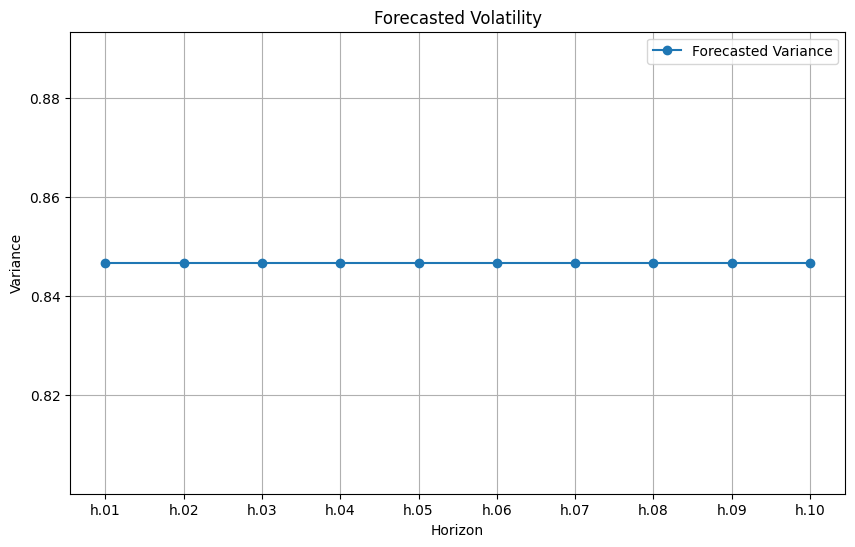

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate returns with volatility clustering
n = 1000
omega = 0.1
alpha = 0.8

errors = np.random.normal(size=n)
volatility = np.zeros(n)
returns = np.zeros(n)

for t in range(1, n):
    volatility[t] = np.sqrt(omega + alpha * errors[t-1]**2)
    returns[t] = volatility[t] * np.random.normal()

# Create a DataFrame
data = pd.DataFrame({"returns": returns, "volatility": volatility})
data.plot(subplots=True, figsize=(10, 6), title="Simulated Returns and Volatility")
plt.savefig("returns_and_volatility.png")
plt.show()

from arch import arch_model

# Fit an ARCH(1) model
arch_model_fit = arch_model(data["returns"], vol="ARCH", p=1).fit()
print(arch_model_fit.summary())

# Forecast volatility
forecast = arch_model_fit.forecast(horizon=10)
forecast_variance = forecast.variance.iloc[-1]

# Plot forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_variance, marker="o", label="Forecasted Variance")
plt.title("Forecasted Volatility")
plt.xlabel("Horizon")
plt.ylabel("Variance")
plt.legend()
plt.grid()
plt.savefig("forecasted_volatility.png")
plt.show()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pymc as pm
import arviz as az
from pmdarima import auto_arima

class BayesianARIMAVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        self.n = 100
        self.x = np.arange(self.n)
        self.y = 5 + 0.5 * self.x + np.random.normal(0, 2, self.n)

        # Fit models
        self.fit_models()

    def fit_models(self):
        # Fit Bayesian AR(1) Model
        with pm.Model() as model:
            phi = pm.Normal("phi", mu=0, sigma=1)
            sigma = pm.HalfNormal("sigma", sigma=1)
            init_dist = pm.Normal.dist(0, 10)
            y_obs = pm.GaussianRandomWalk("y_obs", sigma=sigma,
                                        init_dist=init_dist, shape=self.n)
            y_like = pm.Normal("y_like", mu=y_obs, sigma=sigma, observed=self.y)
            self.trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1)

        # Fit traditional ARIMA
        self.arima_model = auto_arima(self.y, error_action="ignore",
                                    suppress_warnings=True, seasonal=False)
        self.arima_pred = self.arima_model.predict(n_periods=self.n)

        # Get Bayesian predictions
        with model:
            posterior_pred = pm.sample_posterior_predictive(self.trace)
            self.posterior_samples = posterior_pred.posterior_predictive.y_obs

        self.posterior_mean = self.posterior_samples.mean(dim=['chain', 'draw']).values
        self.credible_intervals = np.percentile(self.posterior_samples,
                                              [2.5, 97.5], axis=1)

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])  # Original series + predictions
        ax2 = fig.add_subplot(gs[1, 0])  # Bayesian diagnostics
        ax3 = fig.add_subplot(gs[1, 1])  # Error metrics

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for visualization
            window = 30
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Plot 1: Original Series with Predictions
            ax1.plot(self.x[start_idx:end_idx], self.y[start_idx:end_idx],
                    'b-', label='Actual', alpha=0.7)
            ax1.plot(self.x[start_idx:end_idx],
                    self.posterior_mean[start_idx:end_idx],
                    'r-', label='Bayesian AR(1)')
            ax1.plot(self.x[start_idx:end_idx],
                    self.arima_pred[start_idx:end_idx],
                    'g-', label='ARIMA')
            ax1.fill_between(self.x[start_idx:end_idx],
                           self.credible_intervals[0, start_idx:end_idx],
                           self.credible_intervals[1, start_idx:end_idx],
                           color='r', alpha=0.2)
            ax1.set_title('Time Series Predictions')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Bayesian Trace Plot
            param_name = list(self.trace.posterior.keys())[frame % 2]
            az.plot_trace(self.trace, var_names=[param_name], ax=ax2)
            ax2.set_title(f'Trace Plot: {param_name}')

            # Plot 3: Error Metrics
            mape_bayes = np.mean(np.abs((self.y - self.posterior_mean) / self.y)) * 100
            mape_arima = np.mean(np.abs((self.y - self.arima_pred) / self.y)) * 100

            bars = ax3.bar(['Bayesian AR(1)', 'ARIMA'],
                         [mape_bayes, mape_arima])

            for bar in bars:
                height = bar.get_height()
                ax3.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}%',
                        ha='center', va='bottom')

            ax3.set_title('Mean Absolute Percentage Error (MAPE)')
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=100,
                           interval=200,
                           repeat=True)
        return anim

# Create and save animation
visualizer = BayesianARIMAVisualizer()
anim = visualizer.create_animation()
anim.save('bayesian_arima_comparison.gif', writer='pillow', fps=5)
plt.close()


Output()

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AttributeError: 'Dataset' object has no attribute 'y_obs'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pymc as pm
import arviz as az
from pmdarima import auto_arima

class BayesianARIMAVisualizer:
    def __init__(self):
        # Generate sample data
        np.random.seed(42)
        self.n = 100
        self.x = np.arange(self.n)
        self.y = 5 + 0.5 * self.x + np.random.normal(0, 2, self.n)

        # Fit models
        self.fit_models()

    def fit_models(self):
        # Fit Bayesian AR(1) Model
        with pm.Model() as model:
            phi = pm.Normal("phi", mu=0, sigma=1)
            sigma = pm.HalfNormal("sigma", sigma=1)
            init_dist = pm.Normal.dist(0, 10)
            y_obs = pm.GaussianRandomWalk("y_obs", sigma=sigma,
                                        init_dist=init_dist, shape=self.n)
            y_like = pm.Normal("y_like", mu=y_obs, sigma=sigma, observed=self.y)
            self.trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1)

        # Fit traditional ARIMA
        self.arima_model = auto_arima(self.y, error_action="ignore",
                                    suppress_warnings=True, seasonal=False)
        self.arima_pred = self.arima_model.predict(n_periods=self.n)

        # Get Bayesian predictions
        with model:
            posterior_pred = pm.sample_posterior_predictive(self.trace)
            self.posterior_samples = posterior_pred.posterior_predictive['y_like'].values

        # Calculate posterior mean and credible intervals
        self.posterior_mean = np.mean(self.posterior_samples, axis=(0, 1))
        self.credible_intervals = np.percentile(
            self.posterior_samples.reshape(-1, self.n),
            [2.5, 97.5],
            axis=0
        )

        # Extract parameter traces for plotting
        self.param_traces = {
            'phi': self.trace.posterior['phi'].values.flatten(),
            'sigma': self.trace.posterior['sigma'].values.flatten()
        }

    def create_animation(self):
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2)

        ax1 = fig.add_subplot(gs[0, :])  # Original series + predictions
        ax2 = fig.add_subplot(gs[1, 0])  # Sigma posterior
        ax3 = fig.add_subplot(gs[1, 1])  # Phi posterior

        # Pre-calculate parameter ranges for consistent plotting
        sigma_range = (min(self.param_traces['sigma']), max(self.param_traces['sigma']))
        phi_range = (min(self.param_traces['phi']), max(self.param_traces['phi']))

        def animate(frame):
            for ax in [ax1, ax2, ax3]:
                ax.clear()

            # Window for visualization
            window = 30
            start_idx = frame % (self.n - window)
            end_idx = start_idx + window

            # Calculate number of samples to show based on frame
            n_samples = int((frame + 1) * len(self.param_traces['sigma']) / 100)
            n_samples = min(n_samples, len(self.param_traces['sigma']))

            # Plot 1: Original Series with Predictions
            ax1.plot(self.x[start_idx:end_idx], self.y[start_idx:end_idx],
                    'b-', label='Actual', alpha=0.7)
            ax1.plot(self.x[start_idx:end_idx],
                    self.posterior_mean[start_idx:end_idx],
                    'r-', label='Bayesian AR(1)')
            ax1.plot(self.x[start_idx:end_idx],
                    self.arima_pred[start_idx:end_idx],
                    'g-', label='ARIMA')
            ax1.fill_between(self.x[start_idx:end_idx],
                           self.credible_intervals[0, start_idx:end_idx],
                           self.credible_intervals[1, start_idx:end_idx],
                           color='r', alpha=0.2)
            ax1.set_title('Time Series Predictions')
            ax1.legend()
            ax1.grid(True)

            # Plot 2: Sigma posterior (accumulating)
            sigma_values = self.param_traces['sigma'][:n_samples]
            ax2.hist(sigma_values, bins=30, density=True, alpha=0.6, color='blue')
            ax2.axvline(np.mean(sigma_values), color='r', linestyle='--',
                       label=f'Mean: {np.mean(sigma_values):.3f}')
            ax2.set_title(f'Posterior Distribution: σ (n={n_samples})')
            ax2.set_xlim(sigma_range)
            ax2.legend()
            ax2.grid(True)

            # Plot 3: Phi posterior (accumulating)
            phi_values = self.param_traces['phi'][:n_samples]
            ax3.hist(phi_values, bins=30, density=True, alpha=0.6, color='green')
            ax3.axvline(np.mean(phi_values), color='r', linestyle='--',
                       label=f'Mean: {np.mean(phi_values):.3f}')
            ax3.set_title(f'Posterior Distribution: φ (n={n_samples})')
            ax3.set_xlim(phi_range)
            ax3.legend()
            ax3.grid(True)

            plt.tight_layout()

        anim = FuncAnimation(fig, animate,
                           frames=100,
                           interval=200,
                           repeat=True)
        return anim

# Create and save animation
visualizer = BayesianARIMAVisualizer()
anim = visualizer.create_animation()
anim.save('bayesian_arima_comparison.gif', writer='pillow', fps=5)
plt.close()


Output()

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
